# Students Adaptivity Level In Online Education 

* __Student name:__ Emily Marsh
* __Student pace:__ Flex
* __Scheduled project review date/time:__ January 11th 1pm EST
* __Instructor name:__ Joe Comeaux

# Introduction

During the COVID pandemic many students were suddenly thrust into a digital only learning enviorment. Some student adapted to this new learning enviorment better then others and those who did not suffered a huge set back in terms of their education. However, online learning is here to stay. The Department of Education has commissioned this project to create a model to predict a students adaptivity level in order to identify students who need more assistance adapting to online learning and how best to help them.

# Business Objective

This project will assist the Federal Department of Education by creating a model that will predict a students level of adaptivity based on twelve independent factors. The Department will use this model to identify students who are at risk of being low or moderate level of adaptivity to online learning. The model will also be used to identify which features are the most important for acheiving a high level of adaptivity. These features, once discovered, can be used to recommend modifications for online curriculum, support for students and recommendations that the Department of Education can share with educators, parents and students. Students can have three different levels of adaptivity to online education:

* __Low__ 
* __Moderate__
* __High__

Since the model will be used for identifying feature importance as well as predicting the level of adaptivity of the student, F1 Score will be used to assess the accuracy of the models developed using the dataset. The reason for using an F1 score versus any other metrics of accuracy is that eliminating false negatives and false positives will ensure the accuracy of the feature recommendations. This model will be designed to be proactive as well as reactive, therefore eliminating false positives and negatives will be the goal. 

# Dataset

The dataset used for this project is from Kaggle. The information in the dataset was collected using an online and offline survey and was sent to students at varying education levels in Bangledesh. Overall, the dataset contains 1205 survey responses collected between Dec 10th 2020 and Feb 5th 2021. The 14 attributes for each entry are are age, gender, level, govt./non-govt. institution, location, IT student or not, educational background, load shedding level, internet quality, class-time, the economic condition of the family, device type used while attending classes, and institution’s own LMS availability. A table from the paper published about the methodology of this dataset is included below with a detailed description of each feature.

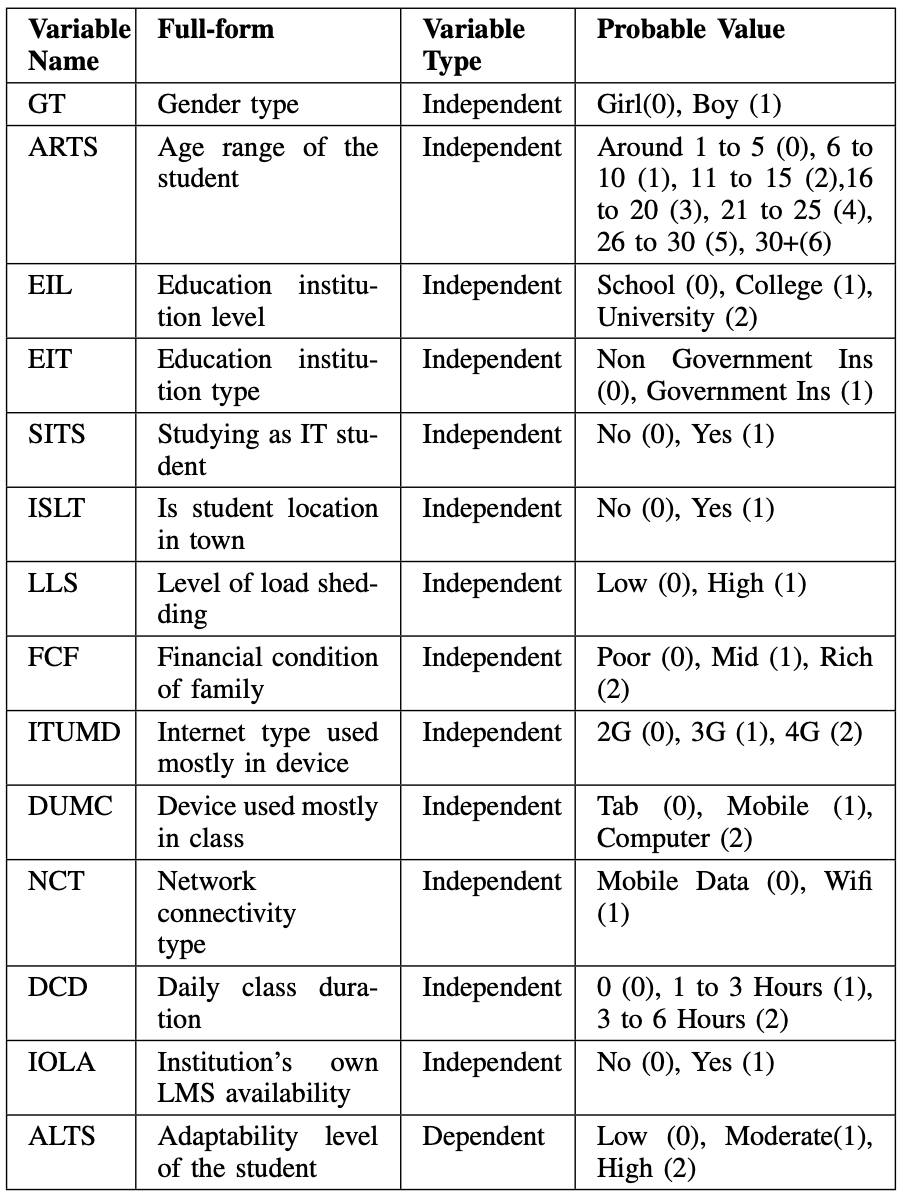

## Import Libraries

In [124]:
#importing relevant tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import shap
shap.initjs()
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

[(0.48942421, 0.72854938, 0.56751036), (0.34892097, 0.64828676, 0.56513633), (0.24929311, 0.56486397, 0.5586654), (0.15615526, 0.47913212, 0.54850526), (0.11131735, 0.39155635, 0.53422678), (0.14573579, 0.29354139, 0.49847009)]


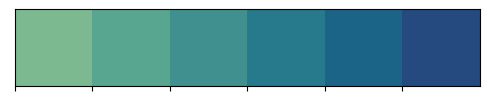

In [125]:
#creating a consistent color palatte for visualizations
pal = sns.color_palette("crest")
print(pal)
sns.palplot(pal)

## Initial Dataset Exploration

In [3]:
#importing dataset into a pandas dataframe
data = pd.read_csv('students_adaptability_level_online_education 2.csv')

In [4]:
#initial overview of datasets columns and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [5]:
data['Adaptivity Level'].value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

## Data Understanding

Within this dataset, all fourteen features are all object datatypes. This means that all fourteen features will need to be processed in order to create a model that will be able to properly run using the information contained in this dataset. In order to choose the appropriate categorical processing tool, the amount of possible values for each feature must be determined. Additional investigation will also be necessary to determine if there are any null values in the dataset that could interfere with accurate results. 

## Check for Null Values

In [6]:
# checking for null values and returning it as a pandas series
empty=data.isna().sum()
empty

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

After additional investigation, the dataset appears to contain no null values. Therefore no rows or columns will need to be dropped from the dataset. 

## Checking Datatypes

In order to use the information in the dataset to create a model, features must be either a float or integer. In order to convert these categorical columns several pre-processing tools are available for use. Deciding which one to use will be determined by the amount of unique values in each column. 

In [7]:
# examining the data types of the df
data.dtypes.value_counts()

object    14
dtype: int64

# Categorical Data Processing

There are two types of categorical data in the dataset. One is binary, meaning there are only two possible values. The other is multi-categorical, meaning more then two possible values for the feature. These two categorical types will be processed differently in order to limit the amount of columns and as a result the processing time needed to develop the appropriate model for the dataset.

## Processing Adaptivity Level

Since the different levels of adaptivity have an inherent ordered relationship, this type of pre-processing using cat codes will assign numeric values that reflect this relationship to make interpretation easier later on. 

In [8]:
# assigning numeric values to Adaptivity Level

data['Adaptivity Level'] = pd.Categorical(data['Adaptivity Level'], ['Low', 'Moderate', 'High'], ordered=True)
data['Adaptivity Level'] = data['Adaptivity Level'].cat.codes

In [9]:
#checking numeric values

data['Adaptivity Level'].value_counts()

1    625
0    480
2    100
Name: Adaptivity Level, dtype: int64

The categorical feature Adaptivity Level has now been processed to be a integer data type with 0 correlating with the low values, 1 with the moderate values, and 2 with high values of the original dataset. 

## Processing Aspects of Dataset

In [10]:
#examining unique values

data.nunique()

Gender                 2
Age                    6
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self Lms               2
Device                 3
Adaptivity Level       3
dtype: int64

By exploring the total number of distinct values in each feature, it becomes apparent that there are 7 binary features and 7 multi categorical features. 

In [11]:
#inspecting values

data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,1
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,1
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,1
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,1
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,0


# Binary Categories

For the 7 Binary Categories in the Dataset, Ordinal Encoding will be used since this will allow the column to be encoded with numerical values and without expanding the original one column into two. 

## Processing Gender

In [12]:
# Create a variable that contains the relevant column from data
gender_aspects = data[["Gender"]]

# Instantiate an OrdinalEncoder
encoder_ordinal = OrdinalEncoder()

# Fit the encoder on gender_aspects
encoder_ordinal.fit(gender_aspects)

# Inspect the categories of the fitted encoder
encoder_ordinal.categories_[0]

array(['Boy', 'Girl'], dtype=object)

In [13]:
# Transform gender_aspects using the encoder and assign the result to gender_encoded_aspect
gender_encoded_aspect = encoder_ordinal.transform(gender_aspects)

# Flatten for appropriate shape
gender_encoded_aspect = gender_encoded_aspect.flatten()

# Visually inspect gender_encoded_aspect
gender_encoded_aspect

array([0., 1., 1., ..., 0., 1., 1.])

In [14]:
# Replace value of Gender
data["Gender"] = gender_encoded_aspect

# Visually inspect data
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,1
1,1.0,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,1
2,1.0,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,1
3,1.0,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,1
4,1.0,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,0
1201,1.0,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,1
1202,0.0,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,1
1203,1.0,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,0


The Gender categorical feature was successfully processed to have a binary integer value, therefore conveying the same information but in a way that can be used to create an appropriate model. This same process will be used on the remaining 6 binary categorical features. 

## Processing Institution Type

In [15]:
# processing the Instituation Type binary feature
instu_aspects = data[["Institution Type"]]
encoder_ordinal.fit(instu_aspects)
instu_encoded_aspect = encoder_ordinal.transform(instu_aspects)
data["Institution Type"] = instu_encoded_aspect

# Visually inspect aspects
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,21-25,University,1.0,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,1
1,1.0,21-25,University,1.0,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,1
2,1.0,16-20,College,0.0,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,1
3,1.0,11-15,School,1.0,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,1
4,1.0,16-20,School,1.0,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,16-20,College,1.0,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,0
1201,1.0,16-20,College,1.0,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,1
1202,0.0,11-15,School,1.0,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,1
1203,1.0,16-20,College,1.0,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,0


## Processing IT Student

In [16]:
# processing the IT Students binary feature
it_stu_aspects = data[["IT Student"]]
encoder_ordinal.fit(it_stu_aspects)
it_stu_encoded_aspects = encoder_ordinal.transform(it_stu_aspects)
data["IT Student"] = it_stu_encoded_aspects

# Visually inspect aspects
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,21-25,University,1.0,0.0,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,1
1,1.0,21-25,University,1.0,0.0,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,1
2,1.0,16-20,College,0.0,0.0,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,1
3,1.0,11-15,School,1.0,0.0,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,1
4,1.0,16-20,School,1.0,0.0,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,16-20,College,1.0,0.0,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,0
1201,1.0,16-20,College,1.0,0.0,No,High,Mid,Wifi,4G,3-6,No,Mobile,1
1202,0.0,11-15,School,1.0,0.0,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,1
1203,1.0,16-20,College,1.0,0.0,No,Low,Mid,Wifi,4G,1-3,No,Mobile,0


## Processing Location

In [17]:
# processing the Location binary feature
loca_aspects = data[["Location"]]
encoder_ordinal.fit(loca_aspects)
loca_encoded_aspects = encoder_ordinal.transform(loca_aspects)
data["Location"] = loca_encoded_aspects

# Visually inspect aspects
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,21-25,University,1.0,0.0,1.0,Low,Mid,Wifi,4G,3-6,No,Tab,1
1,1.0,21-25,University,1.0,0.0,1.0,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,1
2,1.0,16-20,College,0.0,0.0,1.0,Low,Mid,Wifi,4G,1-3,No,Mobile,1
3,1.0,11-15,School,1.0,0.0,1.0,Low,Mid,Mobile Data,4G,1-3,No,Mobile,1
4,1.0,16-20,School,1.0,0.0,1.0,Low,Poor,Mobile Data,3G,0,No,Mobile,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,16-20,College,1.0,0.0,1.0,Low,Mid,Wifi,4G,1-3,No,Mobile,0
1201,1.0,16-20,College,1.0,0.0,0.0,High,Mid,Wifi,4G,3-6,No,Mobile,1
1202,0.0,11-15,School,1.0,0.0,1.0,Low,Mid,Mobile Data,3G,1-3,No,Mobile,1
1203,1.0,16-20,College,1.0,0.0,0.0,Low,Mid,Wifi,4G,1-3,No,Mobile,0


## Processing Load Shedding

In [18]:
# processing the Load Shedding binary feature
load_aspects = data[["Load-shedding"]]
encoder_ordinal.fit(load_aspects)
load_encoded_aspects = encoder_ordinal.transform(load_aspects)
data["Load-shedding"] = load_encoded_aspects

# Visually inspect aspects
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,21-25,University,1.0,0.0,1.0,1.0,Mid,Wifi,4G,3-6,No,Tab,1
1,1.0,21-25,University,1.0,0.0,1.0,0.0,Mid,Mobile Data,4G,1-3,Yes,Mobile,1
2,1.0,16-20,College,0.0,0.0,1.0,1.0,Mid,Wifi,4G,1-3,No,Mobile,1
3,1.0,11-15,School,1.0,0.0,1.0,1.0,Mid,Mobile Data,4G,1-3,No,Mobile,1
4,1.0,16-20,School,1.0,0.0,1.0,1.0,Poor,Mobile Data,3G,0,No,Mobile,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,16-20,College,1.0,0.0,1.0,1.0,Mid,Wifi,4G,1-3,No,Mobile,0
1201,1.0,16-20,College,1.0,0.0,0.0,0.0,Mid,Wifi,4G,3-6,No,Mobile,1
1202,0.0,11-15,School,1.0,0.0,1.0,1.0,Mid,Mobile Data,3G,1-3,No,Mobile,1
1203,1.0,16-20,College,1.0,0.0,0.0,1.0,Mid,Wifi,4G,1-3,No,Mobile,0


## Processing Internet Type

In [19]:
# processing the Internet Type binary feature
internet_aspects = data[["Internet Type"]]
encoder_ordinal.fit(internet_aspects)
internet_encoded_aspects = encoder_ordinal.transform(internet_aspects)
data["Internet Type"] = internet_encoded_aspects

# Visually inspect aspects
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,21-25,University,1.0,0.0,1.0,1.0,Mid,1.0,4G,3-6,No,Tab,1
1,1.0,21-25,University,1.0,0.0,1.0,0.0,Mid,0.0,4G,1-3,Yes,Mobile,1
2,1.0,16-20,College,0.0,0.0,1.0,1.0,Mid,1.0,4G,1-3,No,Mobile,1
3,1.0,11-15,School,1.0,0.0,1.0,1.0,Mid,0.0,4G,1-3,No,Mobile,1
4,1.0,16-20,School,1.0,0.0,1.0,1.0,Poor,0.0,3G,0,No,Mobile,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,16-20,College,1.0,0.0,1.0,1.0,Mid,1.0,4G,1-3,No,Mobile,0
1201,1.0,16-20,College,1.0,0.0,0.0,0.0,Mid,1.0,4G,3-6,No,Mobile,1
1202,0.0,11-15,School,1.0,0.0,1.0,1.0,Mid,0.0,3G,1-3,No,Mobile,1
1203,1.0,16-20,College,1.0,0.0,0.0,1.0,Mid,1.0,4G,1-3,No,Mobile,0


## Processing Self Lms

In [20]:
# processing the Self Lms binary feature
self_aspects = data[["Self Lms"]]
encoder_ordinal.fit(self_aspects)
self_encoded_aspects = encoder_ordinal.transform(self_aspects)
data["Self Lms"] = self_encoded_aspects

# Visually inspect aspects
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,21-25,University,1.0,0.0,1.0,1.0,Mid,1.0,4G,3-6,0.0,Tab,1
1,1.0,21-25,University,1.0,0.0,1.0,0.0,Mid,0.0,4G,1-3,1.0,Mobile,1
2,1.0,16-20,College,0.0,0.0,1.0,1.0,Mid,1.0,4G,1-3,0.0,Mobile,1
3,1.0,11-15,School,1.0,0.0,1.0,1.0,Mid,0.0,4G,1-3,0.0,Mobile,1
4,1.0,16-20,School,1.0,0.0,1.0,1.0,Poor,0.0,3G,0,0.0,Mobile,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,16-20,College,1.0,0.0,1.0,1.0,Mid,1.0,4G,1-3,0.0,Mobile,0
1201,1.0,16-20,College,1.0,0.0,0.0,0.0,Mid,1.0,4G,3-6,0.0,Mobile,1
1202,0.0,11-15,School,1.0,0.0,1.0,1.0,Mid,0.0,3G,1-3,0.0,Mobile,1
1203,1.0,16-20,College,1.0,0.0,0.0,1.0,Mid,1.0,4G,1-3,0.0,Mobile,0


In [21]:
#inspecting dataset to confirm that all binary categorical features have been encoded
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               1205 non-null   float64
 1   Age                  1205 non-null   object 
 2   Education Level      1205 non-null   object 
 3   Institution Type     1205 non-null   float64
 4   IT Student           1205 non-null   float64
 5   Location             1205 non-null   float64
 6   Load-shedding        1205 non-null   float64
 7   Financial Condition  1205 non-null   object 
 8   Internet Type        1205 non-null   float64
 9   Network Type         1205 non-null   object 
 10  Class Duration       1205 non-null   object 
 11  Self Lms             1205 non-null   float64
 12  Device               1205 non-null   object 
 13  Adaptivity Level     1205 non-null   int8   
dtypes: float64(7), int8(1), object(6)
memory usage: 123.7+ KB


All 7 binary categorical features have been successfully encoded to float data types. These features are now ready to be used in model building. 

## Multi Feature Categoricals

 For features that have more then two values, one hot encoder will be used so that the model will be able to determine the effect each of the possible values have on the dependent variable. One hot encoder will split the possible values of the feature so that each value will have its own individual column with a numerical value. 

## Processing Age

In [22]:
#create a variable
age_aspect = data[["Age"]]

# Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# Fit the encoder on the age_aspect
ohe.fit(age_aspect)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['1-5', '11-15', '16-20', '21-25', '26-30', '6-10'], dtype=object)]

In [23]:
# Transform age_aspect using the encoder and assign the result to age_aspect_encoded
age_aspect_encoded = ohe.transform(age_aspect)

# Visually inspect age_aspect_encoded
age_aspect_encoded

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [24]:
# Make the transformed data into a dataframe
age_aspect_encoded = pd.DataFrame(
    # Pass in NumPy array
    age_aspect_encoded,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match data's index
    index=data.index
)

# Visually inspect new dataframe
age_aspect_encoded

,1-5,11-15,16-20,21-25,26-30,6-10
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1200,0.0,0.0,1.0,0.0,0.0,0.0
1201,0.0,0.0,1.0,0.0,0.0,0.0
1202,0.0,1.0,0.0,0.0,0.0,0.0
1203,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
# Drop original Age column
data.drop("Age", axis=1, inplace=True)

# Visually inspect data
data

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,University,1.0,0.0,1.0,1.0,Mid,1.0,4G,3-6,0.0,Tab,1
1,1.0,University,1.0,0.0,1.0,0.0,Mid,0.0,4G,1-3,1.0,Mobile,1
2,1.0,College,0.0,0.0,1.0,1.0,Mid,1.0,4G,1-3,0.0,Mobile,1
3,1.0,School,1.0,0.0,1.0,1.0,Mid,0.0,4G,1-3,0.0,Mobile,1
4,1.0,School,1.0,0.0,1.0,1.0,Poor,0.0,3G,0,0.0,Mobile,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,College,1.0,0.0,1.0,1.0,Mid,1.0,4G,1-3,0.0,Mobile,0
1201,1.0,College,1.0,0.0,0.0,0.0,Mid,1.0,4G,3-6,0.0,Mobile,1
1202,0.0,School,1.0,0.0,1.0,1.0,Mid,0.0,3G,1-3,0.0,Mobile,1
1203,1.0,College,1.0,0.0,0.0,1.0,Mid,1.0,4G,1-3,0.0,Mobile,0


In [26]:
# Concatenate the new dataframe with current data
data = pd.concat([data, age_aspect_encoded], axis=1)

# Visually inspect data
data

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,1-5,11-15,16-20,21-25,26-30,6-10
0,0.0,University,1.0,0.0,1.0,1.0,Mid,1.0,4G,3-6,0.0,Tab,1,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,University,1.0,0.0,1.0,0.0,Mid,0.0,4G,1-3,1.0,Mobile,1,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,College,0.0,0.0,1.0,1.0,Mid,1.0,4G,1-3,0.0,Mobile,1,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,School,1.0,0.0,1.0,1.0,Mid,0.0,4G,1-3,0.0,Mobile,1,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,School,1.0,0.0,1.0,1.0,Poor,0.0,3G,0,0.0,Mobile,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,College,1.0,0.0,1.0,1.0,Mid,1.0,4G,1-3,0.0,Mobile,0,0.0,0.0,1.0,0.0,0.0,0.0
1201,1.0,College,1.0,0.0,0.0,0.0,Mid,1.0,4G,3-6,0.0,Mobile,1,0.0,0.0,1.0,0.0,0.0,0.0
1202,0.0,School,1.0,0.0,1.0,1.0,Mid,0.0,3G,1-3,0.0,Mobile,1,0.0,1.0,0.0,0.0,0.0,0.0
1203,1.0,College,1.0,0.0,0.0,1.0,Mid,1.0,4G,1-3,0.0,Mobile,0,0.0,0.0,1.0,0.0,0.0,0.0


The one hot encoder has successfully processed the age feature and assigned each of the possible six values its own column. Not only will this help the dataset be used to create a model, but it will also help identify the impact each of the values of each feature has on the dependent variable. 

## Processing Other Multi Categories

Since one hot encoder was successful in processing the multi categorical feature Age, it will now be used on the remaining 5 multi categorical features.

## Processing Education Level

In [27]:
edu_aspect = data[["Education Level"]]
ohe.fit(edu_aspect)
edu_aspect_encoded = ohe.transform(edu_aspect)
edu_aspect_encoded = pd.DataFrame(
    edu_aspect_encoded,
    columns=ohe.categories_[0],
    index=data.index)
    
data.drop("Education Level", axis=1, inplace=True)

data = pd.concat([data, edu_aspect_encoded], axis=1)

data

,Gender,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,...,Adaptivity Level,1-5,11-15,16-20,21-25,26-30,6-10,College,School,University
0,0.0,1.0,0.0,1.0,1.0,Mid,1.0,4G,3-6,0.0,...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,1.0,0.0,Mid,0.0,4G,1-3,1.0,...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,1.0,Mid,1.0,4G,1-3,0.0,...,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,1.0,Mid,0.0,4G,1-3,0.0,...,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,1.0,1.0,Poor,0.0,3G,0,0.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,1.0,0.0,1.0,1.0,Mid,1.0,4G,1-3,0.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1201,1.0,1.0,0.0,0.0,0.0,Mid,1.0,4G,3-6,0.0,...,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1202,0.0,1.0,0.0,1.0,1.0,Mid,0.0,3G,1-3,0.0,...,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1203,1.0,1.0,0.0,0.0,1.0,Mid,1.0,4G,1-3,0.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Processing Financial Condition

In [28]:
fin_aspect = data[['Financial Condition']]
ohe.fit(fin_aspect)
fin_aspect_encoded = ohe.transform(fin_aspect)
fin_aspect_encoded = pd.DataFrame(
    fin_aspect_encoded,
    columns=ohe.categories_[0],
    index=data.index)
    
data.drop("Financial Condition", axis=1, inplace=True)

data = pd.concat([data, fin_aspect_encoded], axis=1)

data


,Gender,Institution Type,IT Student,Location,Load-shedding,Internet Type,Network Type,Class Duration,Self Lms,Device,...,16-20,21-25,26-30,6-10,College,School,University,Mid,Poor,Rich
0,0.0,1.0,0.0,1.0,1.0,1.0,4G,3-6,0.0,Tab,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,4G,1-3,1.0,Mobile,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,1.0,4G,1-3,0.0,Mobile,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,1.0,0.0,4G,1-3,0.0,Mobile,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,1.0,1.0,0.0,3G,0,0.0,Mobile,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,1.0,0.0,1.0,1.0,1.0,4G,1-3,0.0,Mobile,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1201,1.0,1.0,0.0,0.0,0.0,1.0,4G,3-6,0.0,Mobile,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1202,0.0,1.0,0.0,1.0,1.0,0.0,3G,1-3,0.0,Mobile,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1203,1.0,1.0,0.0,0.0,1.0,1.0,4G,1-3,0.0,Mobile,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Processing Network Type

In [29]:
net_aspect = data[["Network Type"]]
ohe.fit(net_aspect)
net_aspect_encoded = ohe.transform(net_aspect)
net_aspect_encoded = pd.DataFrame(
    net_aspect_encoded,
    columns=ohe.categories_[0],
    index=data.index)
    
data.drop("Network Type", axis=1, inplace=True)

data = pd.concat([data, net_aspect_encoded], axis=1)

data

,Gender,Institution Type,IT Student,Location,Load-shedding,Internet Type,Class Duration,Self Lms,Device,Adaptivity Level,...,6-10,College,School,University,Mid,Poor,Rich,2G,3G,4G
0,0.0,1.0,0.0,1.0,1.0,1.0,3-6,0.0,Tab,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,1.0,0.0,0.0,1-3,1.0,Mobile,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,1.0,1.0,1-3,0.0,Mobile,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,1.0,1.0,0.0,1-3,0.0,Mobile,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,1.0,1.0,0.0,0,0.0,Mobile,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,1.0,0.0,1.0,1.0,1.0,1-3,0.0,Mobile,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1201,1.0,1.0,0.0,0.0,0.0,1.0,3-6,0.0,Mobile,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1202,0.0,1.0,0.0,1.0,1.0,0.0,1-3,0.0,Mobile,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1203,1.0,1.0,0.0,0.0,1.0,1.0,1-3,0.0,Mobile,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Processing Class Duration

In [30]:
class_aspect = data[['Class Duration']]
ohe.fit(class_aspect)
class_aspect_encoded = ohe.transform(class_aspect)
class_aspect_encoded = pd.DataFrame(
    class_aspect_encoded,
    columns=ohe.categories_[0],
    index=data.index)
    
data.drop("Class Duration", axis=1, inplace=True)

data = pd.concat([data, class_aspect_encoded], axis=1)

data

,Gender,Institution Type,IT Student,Location,Load-shedding,Internet Type,Self Lms,Device,Adaptivity Level,1-5,...,University,Mid,Poor,Rich,2G,3G,4G,0,1-3,3-6
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,Tab,1,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,Mobile,1,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Mobile,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,Mobile,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,1.0,0.0,1.0,1.0,0.0,0.0,Mobile,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,1.0,0.0,1.0,1.0,1.0,0.0,Mobile,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1201,1.0,1.0,0.0,0.0,0.0,1.0,0.0,Mobile,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1202,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Mobile,1,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1203,1.0,1.0,0.0,0.0,1.0,1.0,0.0,Mobile,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Processing Device

In [31]:
device_aspect = data[['Device']]
ohe.fit(device_aspect)
device_aspect_encoded = ohe.transform(device_aspect)
device_aspect_encoded = pd.DataFrame(
    device_aspect_encoded,
    columns=ohe.categories_[0],
    index=data.index)

data.drop("Device", axis=1, inplace=True)

data = pd.concat([data, device_aspect_encoded], axis=1)

data

,Gender,Institution Type,IT Student,Location,Load-shedding,Internet Type,Self Lms,Adaptivity Level,1-5,11-15,...,Rich,2G,3G,4G,0,1-3,3-6,Computer,Mobile,Tab
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1201,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1202,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1203,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [32]:
# Inspecting feature types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            1205 non-null   float64
 1   Institution Type  1205 non-null   float64
 2   IT Student        1205 non-null   float64
 3   Location          1205 non-null   float64
 4   Load-shedding     1205 non-null   float64
 5   Internet Type     1205 non-null   float64
 6   Self Lms          1205 non-null   float64
 7   Adaptivity Level  1205 non-null   int8   
 8   1-5               1205 non-null   float64
 9   11-15             1205 non-null   float64
 10  16-20             1205 non-null   float64
 11  21-25             1205 non-null   float64
 12  26-30             1205 non-null   float64
 13  6-10              1205 non-null   float64
 14  College           1205 non-null   float64
 15  School            1205 non-null   float64
 16  University        1205 non-null   float64


Now that all of the original 14 categorical features have been split into 29 float and integer columns, the dataset is properly prepared to be used for additional analysis and model building. 

# Dataset Exploration and Initial Analysis

Now that the categorical features have been processed, some intial data exploration and analysis is helpful in understanding initial trends within the dataset before begining to build the baseline models. 

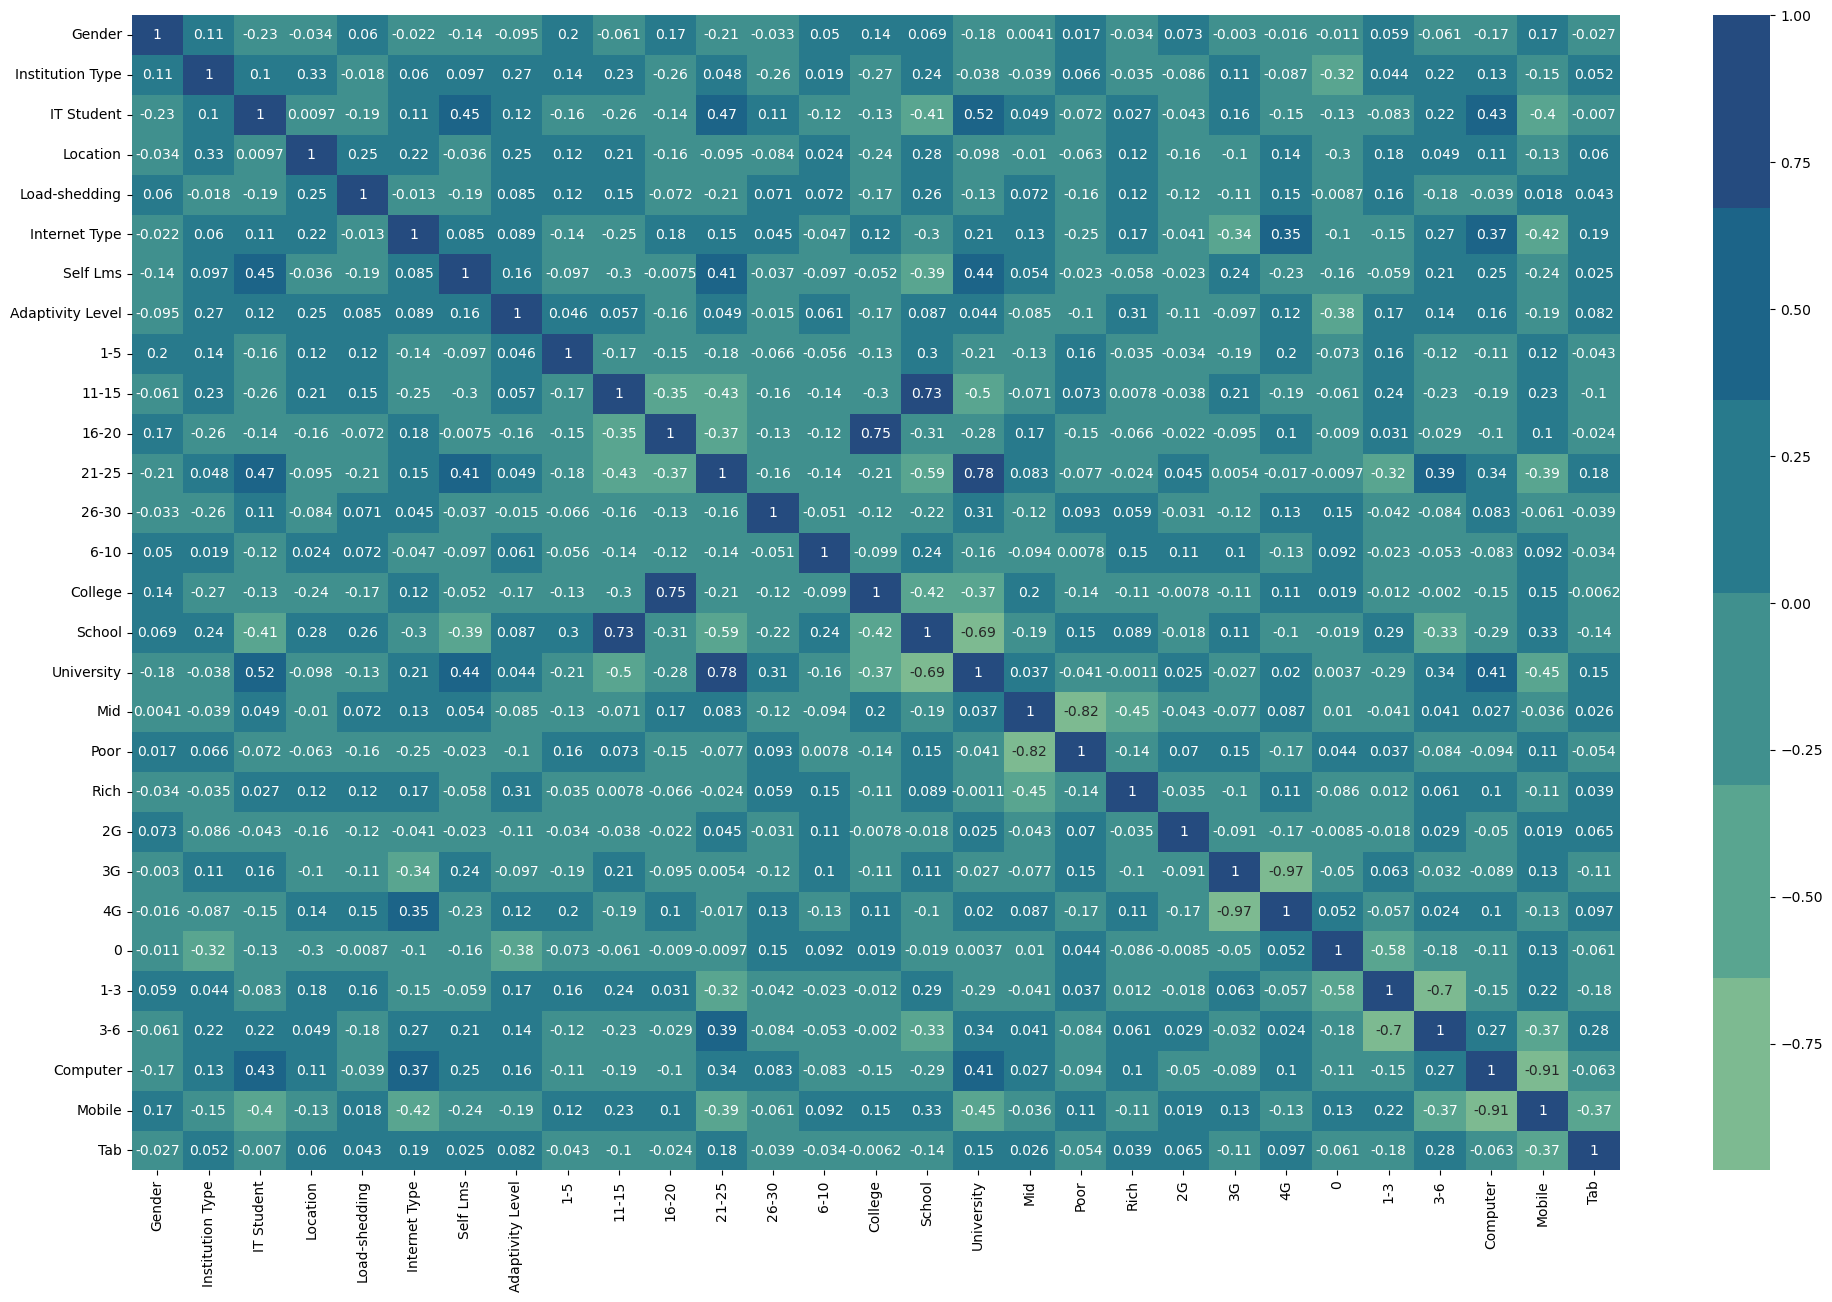

In [33]:
# Early correlation matrix to understand relationships within the features that are being analyzed

plt.figure(figsize= (24,15))
corrM = data.corr()

sns.heatmap(corrM, annot = True, cmap=pal)
plt.show()

The correlation matrix seems to indicate that no one variable highly correlates with adaptivity level, either positvely or negatively. This may indicate that no one feature has an outsized impact on the dependent variable. There is also high correlation between categorical feature values from the same feature that have been processed into seperate columns which would be expected. 

In [34]:
#split dataset into dependent variables and indepedent variables

aspects = data.drop(columns=['Adaptivity Level'], axis=1)
target = data['Adaptivity Level']

In [35]:
#initial inspection of the distribution of values
aspects.describe()

,Gender,Institution Type,IT Student,Location,Load-shedding,Internet Type,Self Lms,1-5,11-15,16-20,...,Rich,2G,3G,4G,0,1-3,3-6,Computer,Mobile,Tab
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,...,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,0.449793,0.682988,0.252282,0.775934,0.833195,0.423237,0.174274,0.067220,0.292946,0.230705,...,0.070539,0.015768,0.341079,0.643154,0.127801,0.697095,0.175104,0.134440,0.840664,0.024896
std,0.497679,0.465506,0.434503,0.417139,0.372956,0.494277,0.379502,0.250506,0.455303,0.421459,...,0.256160,0.124627,0.474269,0.479268,0.334007,0.459705,0.380214,0.341266,0.366141,0.155874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at the distribution of values within the features, scaling should not be an issue since all of the values in the dataset are either 0 or 1. There is a variety of distributions within the different features. For example for Gender there seems to be a roughly equal distribtuion of men and women, but for Device the majority of entries used mobile devices. This distribution could contribute to an uneven dataset.

In [36]:
#inspection of dependent variable distribution
target.value_counts()

1    625
0    480
2    100
Name: Adaptivity Level, dtype: int64

The distribution of the dependent variable values in this dataset are not equally distributed. There are many more moderate or low adaptivity values then there are high adaptvity values. This unequal distribution will need to be taken into account when assessing the accuracy of the model. 

# Building Baseline Models

In order to determine which baseline model is appropriate for the dataset, three initial models will be built. Once built, the most accurate baseline model will be selected to fine tune and determine feature importance. The F1 score will be used as a determinate of which model is the most accurate. The reason the F1 score will be used is that, as an expression of the precision and recall of the model, the higest F1 score limits the amount of false positives and false negatives. This is important since the project wants a model to correctly assess the adaptivity level of students at all three values (low, moderate & high). 

## Baseline Logistic Regression Model

In [37]:
#instatiate a test train split

X = aspects
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, \
                                                    random_state = 42)

In [38]:
#instantiate logistic regression model
logreg = LogisticRegression(random_state=123)

#fit the model onto the train sets
logreg.fit(X_train,y_train)
logreg

#predict values of the model
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

#evaluate model 
names = ['Low Adaptivity','Moderate Adaptivity','High Adaptivity']
f1_logreg = round(f1_score(y_test,y_hat_test,average='macro'),3)
print(classification_report(y_test,y_hat_test,target_names=names))

                       precision    recall  f1-score   support

     Low Adaptibility       0.75      0.63      0.69       127
Moderate Adaptibility       0.68      0.83      0.75       144
    High Adaptibility       0.75      0.48      0.59        31

             accuracy                           0.71       302
            macro avg       0.73      0.65      0.67       302
         weighted avg       0.72      0.71      0.71       302



## Baseline KNN Model

In [39]:
#instantiate 
knn_baseline_model = KNeighborsClassifier()

#fit onto the data
knn_baseline_model.fit(X_train,y_train)

#predict
y_hat_train = knn_baseline_model.predict(X_train)
y_hat_test = knn_baseline_model.predict(X_test)

#evaluate model 
f1_knn = round(f1_score(y_test,y_hat_test,average='macro'),3)
print(classification_report(y_test,y_hat_test,target_names=names))

                       precision    recall  f1-score   support

     Low Adaptibility       0.84      0.72      0.77       127
Moderate Adaptibility       0.73      0.90      0.80       144
    High Adaptibility       0.76      0.42      0.54        31

             accuracy                           0.77       302
            macro avg       0.78      0.68      0.71       302
         weighted avg       0.78      0.77      0.76       302



## Baseline Decision Tree Model

In [40]:
#instantiate 
clf = DecisionTreeClassifier(criterion='entropy',random_state=123)

#fit the model onto the train sets
clf.fit(X_train,y_train)

#predict 
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

#evaluate model
f1_tree = round(f1_score(y_test,y_hat_test,average='macro'),3)
print(classification_report(y_test,y_hat_test,target_names=names))

                       precision    recall  f1-score   support

     Low Adaptibility       0.94      0.89      0.91       127
Moderate Adaptibility       0.87      0.94      0.91       144
    High Adaptibility       0.85      0.71      0.77        31

             accuracy                           0.90       302
            macro avg       0.89      0.85      0.86       302
         weighted avg       0.90      0.90      0.90       302



# Selecting A Baseline Model

In [41]:
#import the metrics library
print(f'f1-score of baseline logistic regression is {f1_logreg}')
print(f'f1-score of knn model is {f1_knn}')
print(f'f1-score of baseline decision tree is {f1_tree}')

f1-score of baseline logistic regression is 0.675
f1-score of knn model is 0.707
f1-score of baseline decision tree is 0.865


Comparing all three baseline model's F1 scores on the test dataset, it appears that the baseline decision tree model's F1 score for the test dataset is significantly higher then the KNN baseline model's and the logistic regression model's F1 scores. Knowing this, further exploration and modifications will be implemented to improve the performance of the decision tree model.

# Decision Tree Model

In [42]:
#re-run the basline model so all variables are updated correctly
#for the train and test sets

#instantiate 
clf = DecisionTreeClassifier(criterion='entropy',random_state=123)

#fit the model onto the train sets
clf.fit(X_train,y_train)
clf

#predict 
y_tree_train = clf.predict(X_train)
y_tree_test = clf.predict(X_test)

print('TRAIN SCORES')
print(classification_report(y_train,y_tree_train,target_names=names))
print('--------------------------------------------------------------')
print('TEST SCORES')
print(classification_report(y_test,y_tree_test,target_names=names))

accuracy_tree_train = accuracy_score(y_train,y_tree_train)
accuracy_tree_test = accuracy_score(y_test,y_tree_test)

f1_score_tree_train = f1_score(y_train,y_hat_train,average='macro')
f1_score_tree_test = f1_score(y_test,y_hat_test,average='macro')

TRAIN SCORES
                       precision    recall  f1-score   support

     Low Adaptibility       0.93      0.95      0.94       353
Moderate Adaptibility       0.94      0.94      0.94       481
    High Adaptibility       0.92      0.80      0.85        69

             accuracy                           0.93       903
            macro avg       0.93      0.90      0.91       903
         weighted avg       0.93      0.93      0.93       903

--------------------------------------------------------------
TEST SCORES
                       precision    recall  f1-score   support

     Low Adaptibility       0.94      0.89      0.91       127
Moderate Adaptibility       0.87      0.94      0.91       144
    High Adaptibility       0.85      0.71      0.77        31

             accuracy                           0.90       302
            macro avg       0.89      0.85      0.86       302
         weighted avg       0.90      0.90      0.90       302



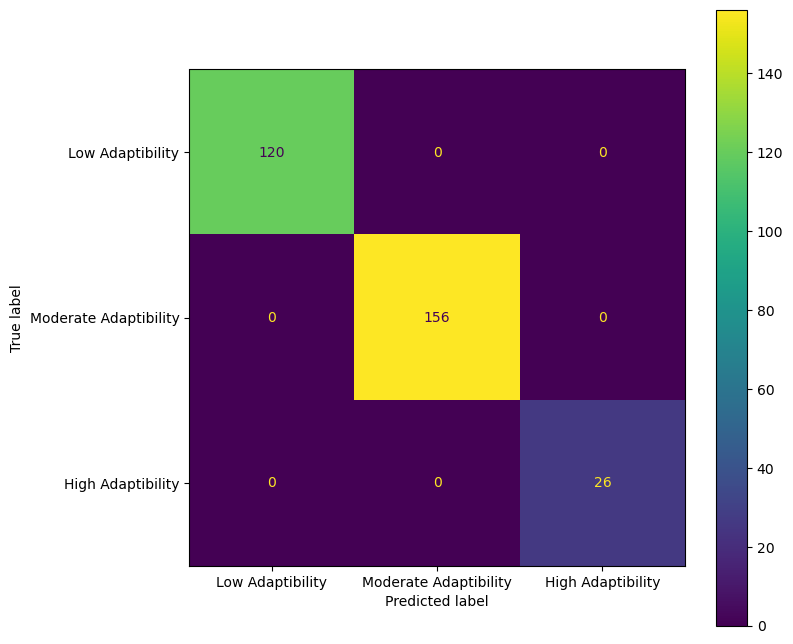

In [43]:
#Plot the confusion matrix of the Decision Tree Model
fig,ax=plt.subplots(figsize=(8,8))
plot_confusion_matrix(clf,X_test,y_tree_test,ax=ax,display_labels=names);

Looking at the performance of the train dataset versus the test dataset in the Decision Tree Model, it appears the model is over fitting to the training data. In particular, the value of high adaptivity appears to show the greatest variation between the train data F1 score and the test data F1 score. This could be because high adaptivity students are the smallest group in the dependent variable compared to Low and Moderate adaptivity students. In order to try and improve the F1 score, hyperparameter tuning might lead to an increase without modifying the actual dataset itself. 

According to the Confusion Matrix, the model is working perfectly to elminate false negatives and false positives. However, this may be due to the dataset having a smaller amount of entries. As a result, for a confusion matrix to be an accuarate assessment of how well the model is performing, more entries would need to be added to the dataset. 

# Hyperparameter Tuning

Since the Decision Tree Model is overfitting to the training data, Tree Pruning is necessary to reduce over fitting and increase the weighted F1 score of the model. In order to prune effectively, optimal Max_Depth, Min_Samples_Split, & Min_Samples_Leaf must be determined. To make sure that effective parameter ranges are being picked, the current parameters that were set be default need to be examined. 

In [44]:
#determine default parameters
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

According to the presets, there was no value assigned for max_depth. As a result a range to explore the optimal values will be assigned to determine the affect of this parameter on the f1 score of the model.

## Determining Optimal Max_Depth

Text(0.5, 1.0, 'max_depth')

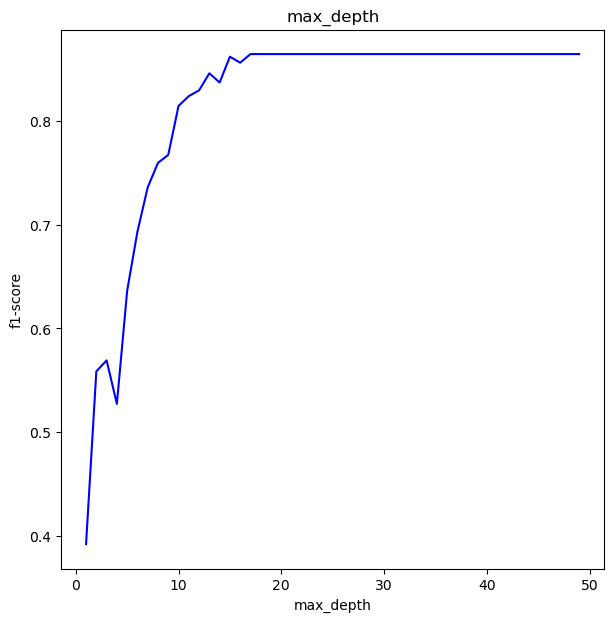

In [45]:
#creating a list of depth values
max_depth = np.arange(1,50)

#creating an empty list to store scores for each depth
f1_test_scores = []


# create a loop for the classifier to run with the different depth values
for depth in max_depth:
    
    #instantiate
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,random_state=123)
    
    #fit the model
    classifier.fit(X_train,y_train)
    
    #predict values
    y_hat_test = classifier.predict(X_test)
    
    #calculate
    f1 = f1_score(y_test,y_hat_test,average='macro')    

    
    #add the scores to the list
    f1_test_scores.append(f1)

    
#visualize the data
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(max_depth,f1_test_scores,c='b')
ax.set_xlabel('max_depth')
ax.set_ylabel('f1-score')
ax.set_title('max_depth')

The accuracy of the model peaks at max_depth 20 and levels off. This will be the optimal value for the adjusted Decision Tree Model. 

## Determining Optimal Min_Samples_Split

In the original min_samples_split default settings, the value was set to 2. Therefore the range will be set to include the default and higher values to see if a more optimal value for the parameter can be determined. 

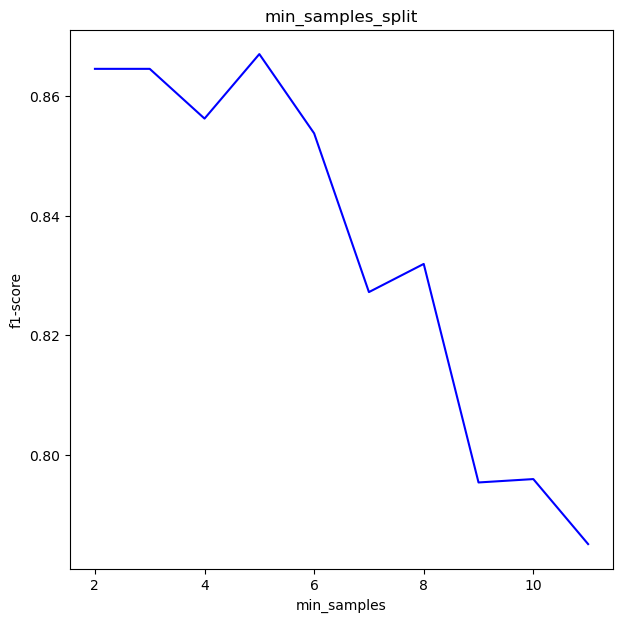

In [46]:
#use the optimum value of depth
depth = 20

#define a range of min_samples_for each split
min_samples_range = np.arange(2,12)

#create a loop with the optimum depth and different min_samples
#creating an empty list to store scores for each depth
f1_test_scores = []

# create a loop for the classifier to run with the different depth values
for sample in min_samples_range:
    
    #instantiate
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,min_samples_split=sample,random_state=123)
    
    #fit the model
    classifier.fit(X_train,y_train)
    
    #predict values
    y_hat_test = classifier.predict(X_test)
    
    #calculate
    f1 = f1_score(y_test,y_hat_test,average='macro')    
    
    #add the scores to the list
    f1_test_scores.append(f1)


#visualize
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(min_samples_range,f1_test_scores,c='b')

ax.set_xlabel('min_samples')
ax.set_ylabel('f1-score')
ax.set_title('min_samples_split')
plt.show();

The accuracy of the model peaks at min_samples 5 and then sharply decreases. This will be the optimal value for the adjusted Decision Tree Model.

## Determining Optimal Min_Samples_Leaf

In the default setting for the Baseline Decision Tree Model, the Min_Samples_Leaf was set to 2. In order to try and optimize the parameter setting, a range will be set that includes 2 but explores values that are higher as well. 

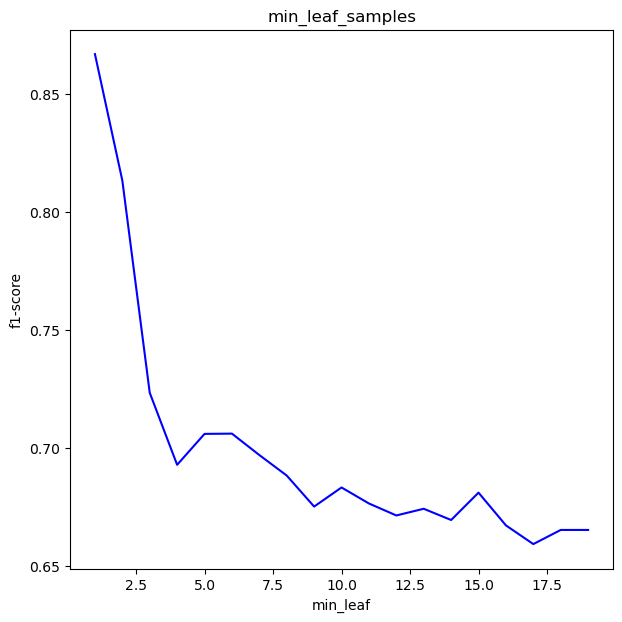

In [47]:
#use the optimum value of depth,min_samples_split
depth = 20
min_samples = 5

#define a range of min_samples_for each split
min_leaf_range = np.arange(1,20)

#create a loop with the optimum depth and different min_samples
#creating an empty list to store scores for each depth
f1_test_scores = []

# create a loop for the classifier to run with the different depth values
for sample in min_leaf_range:
    
    #instantiate
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,min_samples_split=min_samples,
                                       min_samples_leaf=sample, random_state=123)
    
    #fit the model
    classifier.fit(X_train,y_train)
    
    #predict values
    y_hat_test = classifier.predict(X_test)
    
    #calculate
    f1 = f1_score(y_test,y_hat_test,average='macro')    
    
    #add the scores to the list
    f1_test_scores.append(f1)


#visual
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(min_leaf_range,f1_test_scores,c='b')

ax.set_xlabel('min_leaf')
ax.set_ylabel('f1-score')
ax.set_title('min_leaf_samples')

plt.show();

The accuracy of the model peaks at the min_leaf value of 2 and sharply decreases. This will be the optimal value for the adjusted Decision Tree Model. 

# Decision Tree Model with Optimized Parameters

In [48]:
#run the model with the optimized parameters
depth=20
min_samples=5
leaf=2

#instantiate
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,min_samples_split=min_samples,
                                    min_samples_leaf=leaf,random_state=123)

#fit the model
classifier.fit(X_train,y_train)

#predict values
y_hat_train = classifier.predict(X_train)
y_hat_test = classifier.predict(X_test)

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_hat_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_hat_test,target_names=names))

accuracy_optimized_train = accuracy_score(y_train,y_hat_train)
accuracy_optimized_test = accuracy_score(y_test,y_hat_test)

f1_score_optimized_train = f1_score(y_train,y_hat_train,average='macro')
f1_score_optimized_test = f1_score(y_test,y_hat_test,average='macro')

TRAIN SCORES
---------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.92      0.93      0.93       353
Moderate Adaptibility       0.93      0.93      0.93       481
    High Adaptibility       0.89      0.78      0.83        69

             accuracy                           0.92       903
            macro avg       0.91      0.88      0.89       903
         weighted avg       0.92      0.92      0.92       903

TEST SCORES
----------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.91      0.84      0.88       127
Moderate Adaptibility       0.83      0.92      0.87       144
    High Adaptibility       0.79      0.61      0.69        31

             accuracy                           0.86       302
            macro avg       0.84      0.79      0.81       302
         weighted avg       0.86  

The AUC and f1 score of the Decision Tree Model actually went down after this hyperparamter tuning. This is most likely because tuning each individual hyperparameter was not as effective at finding the optimal parameters with this smaller less complicated dataset. A more sophisticated parameter tuning tool like grid search may be more effective. 

## Tuning the Decision Tree with GridSearchCV

Since additional tuning can be done more effectively with the GridSearch tool, the ranges were expanded from the original parameter tuning in order to explore more possible values to find the optimal parameters. These additional values will be the criterion options and additional values will be explored in max_depth, min_samples_split, and min_samples_leaf.

In [49]:
clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_split': [1, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

gs_tree = GridSearchCV(clf, param_grid, cv = 5, scoring='accuracy')
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [50]:
#get predictions from the gridsearch

#predict values
y_gst_train = gs_tree.predict(X_train)
y_gst_test = gs_tree.predict(X_test)

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_gst_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_gst_test,target_names=names))

accuracy_gst_train = accuracy_score(y_train,y_gst_train)
accuracy_gst_test = accuracy_score(y_test,y_gst_test)

f1_score_gst_train = f1_score(y_train,y_gst_train,average='macro')
f1_score_gst_test = f1_score(y_test,y_gst_test,average='macro')

TRAIN SCORES
---------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.92      0.94      0.93       353
Moderate Adaptibility       0.93      0.94      0.93       481
    High Adaptibility       0.92      0.80      0.85        69

             accuracy                           0.93       903
            macro avg       0.92      0.89      0.91       903
         weighted avg       0.93      0.93      0.93       903

TEST SCORES
----------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.94      0.88      0.91       127
Moderate Adaptibility       0.86      0.94      0.90       144
    High Adaptibility       0.84      0.68      0.75        31

             accuracy                           0.89       302
            macro avg       0.88      0.83      0.85       302
         weighted avg       0.89  

Using GridSearch, the accuracy of the model saw a slight increase. Though the accuracy of the train dataset remained the same, there was a slight increase from an accuracy value of .86 on the baseline model to .89 for the test data. Fine tuning the parameters helped minimize the overfitting of the model to the train data without sacrificing the accuracy of the train data, not an easy feat to acheive. So far this optimized Decision Tree is the most accurate model, but in order to confirm this as the best model to acheive the goals of this project ensemble models will be explored to see if a more accurate model for the dataset can be found. 

## Random Forest Classifier Model

A Random Forest Classifier model utilizes multiple Decision Tree Models in order to increase the accuracy of the model overall. Since the Decision Tree Model was so successful with this dataset, it's worth exploring this ensemble method model to see if there are any gains in accuracy.  

In [51]:
#build a baseline Random Forest Classifier

rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [52]:
#predict values
y_rfc_train = rfc.predict(X_train)
y_rfc_test = rfc.predict(X_test)

In [53]:
#fit the model
rfc.fit(X_train,y_train)

#predict values
y_rfc_train = rfc.predict(X_train)
y_rfc_test = rfc.predict(X_test)

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_rfc_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_rfc_test,target_names=names))

accuracy_rfc_train = accuracy_score(y_train,y_rfc_train)
accuracy_rfc_test = accuracy_score(y_test,y_rfc_test)

f1_score_rfc_train = f1_score(y_train,y_rfc_train,average='macro')
f1_score_rfc_test = f1_score(y_test,y_rfc_test,average='macro')

TRAIN SCORES
---------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.91      0.97      0.94       353
Moderate Adaptibility       0.98      0.85      0.91       481
    High Adaptibility       0.59      1.00      0.75        69

             accuracy                           0.90       903
            macro avg       0.83      0.94      0.86       903
         weighted avg       0.93      0.90      0.91       903

TEST SCORES
----------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.90      0.92      0.91       127
Moderate Adaptibility       0.92      0.83      0.88       144
    High Adaptibility       0.67      0.90      0.77        31

             accuracy                           0.88       302
            macro avg       0.83      0.89      0.85       302
         weighted avg       0.89  

The AUC of the Random Forest Model is less then the AUC value of the opimtized Decision Tree. The model also seems to be performing less consistently across all three adaptiblity levels which is not ideal. Using GridSearch, it will be determined if tuning the model can lead to a more consistent and higher AUC value for the test and train datasests. 

## Tuning the Random Forest Classifier with GridSearchCV

In [54]:
#determine default parameters
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [55]:
#define a param grid based on defaults

param_grid = {'criterion':['gini','entropy'],
              'max_depth':[3,6,9,12,15,20],
              'min_samples_leaf': [1,5,10],
              'min_samples_split': [2,4,6,8]
             }

In [56]:
#fit the gridsearch

rf = RandomForestClassifier(class_weight= 'balanced')
grid_rfc = GridSearchCV(rf, param_grid, cv = 5, scoring='accuracy')
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, 12, 15, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='accuracy')

In [57]:
#print the best parameters

grid_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [58]:
#get predictions from the gridsearch

#predict values
y_grf_train = grid_rfc.predict(X_train)
y_grf_test = grid_rfc.predict(X_test)

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_grf_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_grf_test,target_names=names))

accuracy_grf_train = accuracy_score(y_train,y_grf_train)
accuracy_grf_test = accuracy_score(y_test,y_grf_test)

f1_score_grf_train = f1_score(y_train,y_grf_train,average='macro')
f1_score_grf_test = f1_score(y_test,y_grf_test,average='macro')

TRAIN SCORES
---------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.93      0.95      0.94       353
Moderate Adaptibility       0.97      0.86      0.91       481
    High Adaptibility       0.59      1.00      0.75        69

             accuracy                           0.91       903
            macro avg       0.83      0.94      0.87       903
         weighted avg       0.93      0.91      0.91       903

TEST SCORES
----------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.94      0.92      0.93       127
Moderate Adaptibility       0.93      0.87      0.90       144
    High Adaptibility       0.67      0.90      0.77        31

             accuracy                           0.89       302
            macro avg       0.84      0.90      0.86       302
         weighted avg       0.90  

Using GridSearch the AUC score of the Random Forest Classifier model for the test data was able to increase to .89 which is comparable to the optimized Decision Tree Model. One more model, XGBoost, will be explored before settling on a final model.  

## XGBoost Model

The XGBoost Model also utilizes Decision Trees but also incorporates gradient boosting and scaling. This makes the XGBoost model adept at avoiding over fitting. Using this model will hopefully allow for more consistent AUC scores across the test and train datasets. 

In [59]:
y_train.value_counts().sort_index()

0    353
1    481
2     69
Name: Adaptivity Level, dtype: int64

In [60]:
# Instantiate XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')

# Fit XGBClassifier
xgb.fit(X_train, y_train)

# Predict on training and test sets
y_xgb_train = xgb.predict(X_train)
y_xgb_test = xgb.predict(X_test)

accuracy_xgb_train = accuracy_score(y_train,y_xgb_train)
accuracy_xgb_test = accuracy_score(y_test,y_xgb_test)

f1_score_xgb_train = f1_score(y_train,y_xgb_train,average='macro')
f1_score_xgb_test = f1_score(y_test,y_xgb_test,average='macro')

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_xgb_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_xgb_test,target_names=names))

TRAIN SCORES
---------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.93      0.95      0.94       353
Moderate Adaptibility       0.94      0.94      0.94       481
    High Adaptibility       0.92      0.80      0.85        69

             accuracy                           0.93       903
            macro avg       0.93      0.90      0.91       903
         weighted avg       0.93      0.93      0.93       903

TEST SCORES
----------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.94      0.91      0.92       127
Moderate Adaptibility       0.88      0.95      0.92       144
    High Adaptibility       0.88      0.71      0.79        31

             accuracy                           0.91       302
            macro avg       0.90      0.86      0.88       302
         weighted avg       0.91  

The XGBoost Model is the only model that has as high AUC levels for the training data as the Decision Tree Model, however where it out performs is in the testing data. The F1 score for all adaptivity levels is higher in the testing data compared to any of the other models that have been explored. As promised, the XGBoost has done a much better job minimzing overfitting compared to the other models trained on the dataset. Before deciding on which model to utilize, GridSearch will also be implemented on the XGBoost Model to find the optimal parameters. 

## Tuning the XGBoost Model with GridSearchCV

In [61]:
#determine default parameters
xgb.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'mlogloss'}

Since there are many more possible parameters to tune for an XGBoost model, research was done to determine a possible sucessful parameter grid to explore optimizing the XGBoost model. These parameters were found in an article [HERE](https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost) on the website Kaggle. 

In [62]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6]
        }

In [63]:
xgb = XGBClassifier(eval_metric='mlogloss')
grid_xgb = GridSearchCV(xgb, params, scoring='accuracy', cv=None, n_jobs=1)
grid_xgb.fit(X_train, y_train)

best_xgb_parameters = grid_xgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_xgb_parameters.keys()):
    print('%s: %r' % (param_name, best_xgb_parameters[param_name]))

Grid Search found the following optimal parameters: 
colsample_bytree: 0.8
gamma: 0
max_depth: 6
min_child_weight: 1
subsample: 0.8


In [64]:
grid_xgb_training_preds = grid_xgb.predict(X_train)
grid_xgb_test_preds = grid_xgb.predict(X_test)

accuracy_grid_xgb_train = accuracy_score(y_train,grid_xgb_training_preds)
accuracy_grid_xgb_test = accuracy_score(y_test,grid_xgb_test_preds)

f1_score_grid_xgb_train = f1_score(y_train,grid_xgb_training_preds,average='macro')
f1_score_grid_xgb_test = f1_score(y_test,grid_xgb_test_preds,average='macro')

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,grid_xgb_training_preds,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,grid_xgb_test_preds,target_names=names))

TRAIN SCORES
---------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.93      0.95      0.94       353
Moderate Adaptibility       0.94      0.94      0.94       481
    High Adaptibility       0.92      0.80      0.85        69

             accuracy                           0.93       903
            macro avg       0.93      0.90      0.91       903
         weighted avg       0.93      0.93      0.93       903

TEST SCORES
----------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.94      0.94      0.94       127
Moderate Adaptibility       0.91      0.95      0.93       144
    High Adaptibility       0.88      0.71      0.79        31

             accuracy                           0.92       302
            macro avg       0.91      0.87      0.89       302
         weighted avg       0.92  

The new optimized parameters made a slight improvement in the AUC value for the test data, in particular by increasing the F1 score of the Low and Moderate adaptivity. The high adaptivity F1 score is at a similar value as before the optimization. However, this overall increase for the test data will be extremely helpful in determining the importance of individual features according to the model. 

## Visualize Scores Between Models

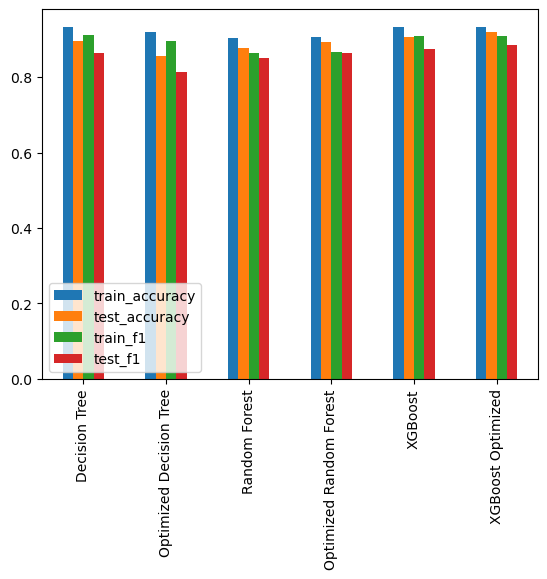

In [65]:
# create a dataframe of the scores for the different models
score_df = pd.DataFrame({'train_accuracy': [accuracy_tree_train, accuracy_optimized_train, accuracy_rfc_train,
                                           accuracy_grf_train, accuracy_xgb_train, accuracy_grid_xgb_train],
                        'test_accuracy': [accuracy_tree_test, accuracy_optimized_test, accuracy_rfc_test,
                                           accuracy_grf_test, accuracy_xgb_test, accuracy_grid_xgb_test],
                        'train_f1': [f1_score_tree_train, f1_score_optimized_train, f1_score_rfc_train,
                                           f1_score_grf_train, f1_score_xgb_train, f1_score_grid_xgb_train],
                         'test_f1': [f1_score_tree_test, f1_score_optimized_test, f1_score_rfc_test,
                                           f1_score_grf_test, f1_score_xgb_test, f1_score_grid_xgb_test]
                        }, index=['Decision Tree', 'Optimized Decision Tree','Random Forest', 
                                  'Optimized Random Forest', 'XGBoost', 'XGBoost Optimized'])


#plot the data
score_df.plot.bar()

plt.legend(loc='lower left');

Using the visualization, the XGBoost Optimized has one of the highest AUC values and F1 scores. Most importantly though, the AUC values and F1 scores are the closest between the test and train data. This shows that the optimized XGBoost is the best model to use for accuracy because it avoided overfitting to the train dataset. This will be the model that will be utilized for prediction and determing feature importance. 

## Confusion Matrix

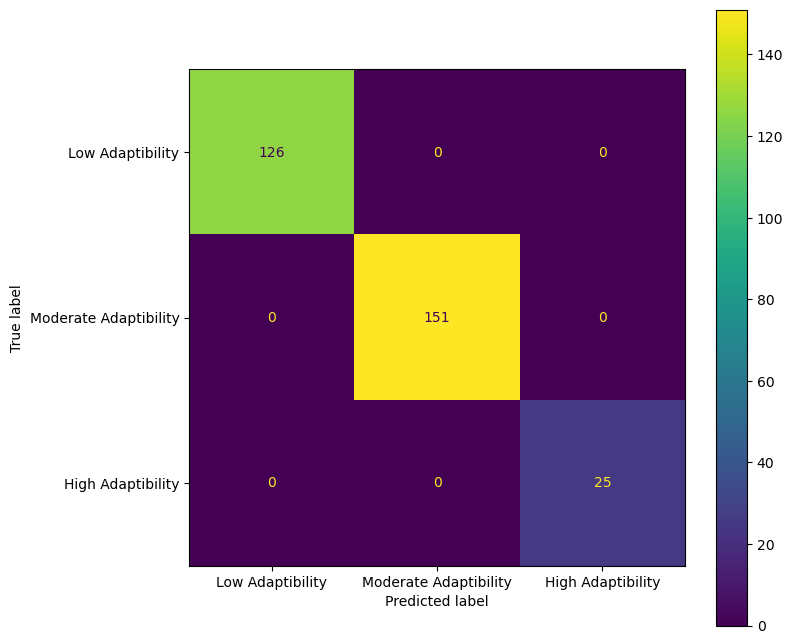

In [66]:
#Plot the confusion matrix of the XGBoost Model
fig,ax=plt.subplots(figsize=(8,8))
plot_confusion_matrix(grid_xgb,X_test,grid_xgb_test_preds,ax=ax,display_labels=names);

According to the confusion matrix above, the XGBoost model is predicting true positives for every value of adaptivity level. This supports the conclusion that the AUC value is the highest in the XGBoost model. It also is important to note that the Baseline Decision Tree Model for the test data also performed perfectly according to the Classification Matrix. However, the realtively smaller size of the dataset is possibly affecting the usefulness of this tool as an assessment of the success of the different models.

## XGBoost Feature Importance

Now that the most successful model has been selected, this model will be used to determine the impact of individual features on the models predictions. By determining these impacts, recommendations can be made proactively for students who are predicted to be in the low or moderate adaptivity levels for online education. In order to determine the feature importance according to the XGBoost optimized model, an article found [HERE](https://mljar.com/blog/feature-importance-xgboost/) laid out three ways to code and explore feature importance. These three methods are the Built In Feature Importance function, permutation importance, and SHAP. All three methods will be explored to determine which will give the most valuable information for the business problem.

## XGBoost Final Model

In [67]:
#assigning optimized XGBoost as Final Model
final_model = XGBClassifier(eval_metric='mlogloss', colsample_bytree=.8, gamma= 0, max_depth=6, min_child_weight=1, 
                    subsample=0.8)

final_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='mlogloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
#Checking Final Models AUC and F1 Score Values
final_model_training_preds = final_model.predict(X_train)
final_model_test_preds = final_model.predict(X_test)

accuracy_final_model_train = accuracy_score(y_train,final_model_training_preds)
accuracy_final_model_test = accuracy_score(y_test,final_model_test_preds)

f1_score_final_model_train = f1_score(y_train,final_model_training_preds,average='macro')
f1_score_final_model_test = f1_score(y_test,final_model_test_preds,average='macro')

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,final_model_training_preds,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,final_model_test_preds,target_names=names))

TRAIN SCORES
---------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.93      0.95      0.94       353
Moderate Adaptibility       0.94      0.94      0.94       481
    High Adaptibility       0.92      0.80      0.85        69

             accuracy                           0.93       903
            macro avg       0.93      0.90      0.91       903
         weighted avg       0.93      0.93      0.93       903

TEST SCORES
----------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.94      0.94      0.94       127
Moderate Adaptibility       0.91      0.95      0.93       144
    High Adaptibility       0.88      0.71      0.79        31

             accuracy                           0.92       302
            macro avg       0.91      0.87      0.89       302
         weighted avg       0.92  

## Xgboost Built-in Feature Importance

Text(0.5, 0, 'Xgboost Feature Importance')

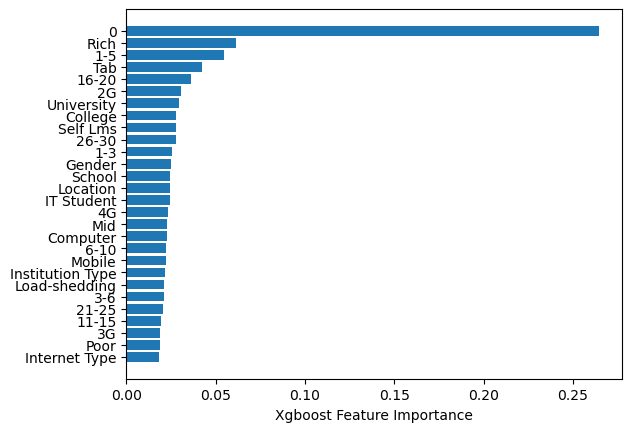

In [69]:
# plot feature importance
sorted_idx = final_model.feature_importances_.argsort()
plt.barh(aspects.columns[sorted_idx], final_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

## Permutation Based Feature Importance

In [70]:
perm_importance = permutation_importance(final_model, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

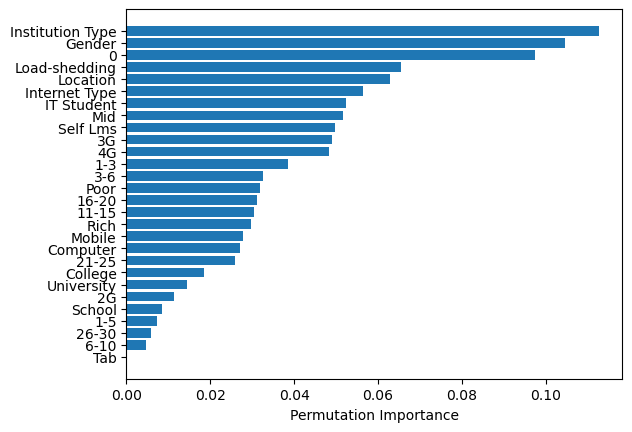

In [71]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(aspects.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

## Feature Importance Computed with SHAP Values

In [72]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

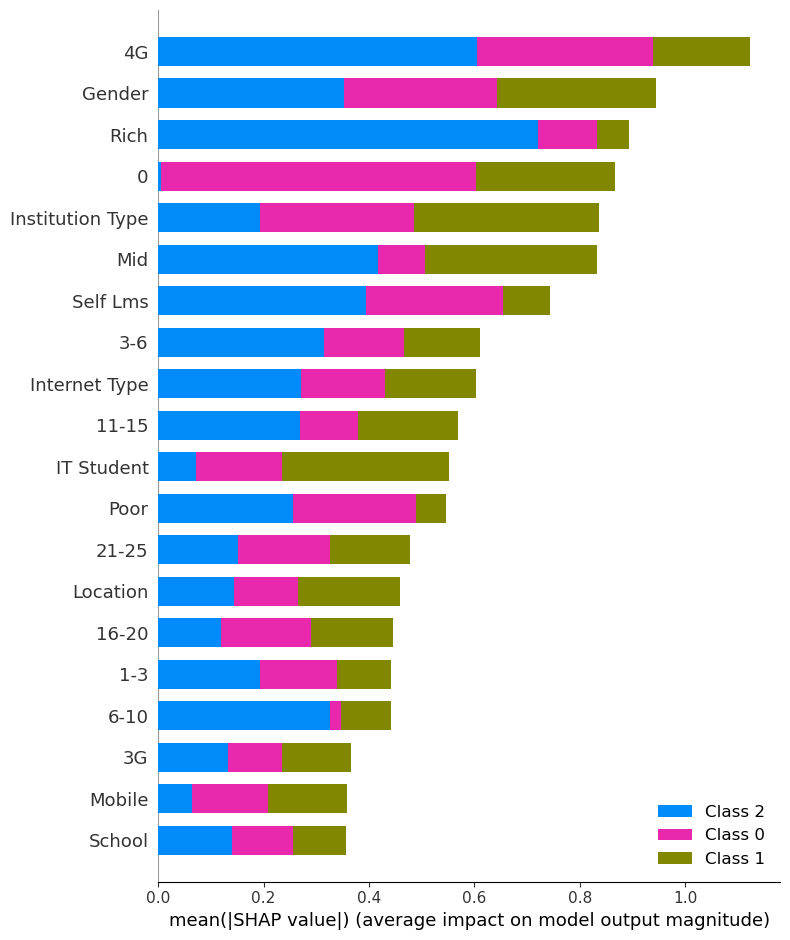

In [73]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

A lot of interesting data is emerging from these three different feature importance computations. However, a drawback of the binary coding technique utilized in pre-processing is that it's difficult to see how those binary categories are important as features. For example, knowing gender as a feature is important is interesting but isn't as productive as knowing whether male or female is an important feature. In order to gain the full information that the feature importance can provide, re-processing of the binary categories in the dataset is necessary. 

## Re-Processing Binary Categoricals with One Hot Encoder

In [74]:
#import the original dataset
df = pd.read_csv('students_adaptability_level_online_education 2.csv')

In [75]:
#examine the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [76]:
#examining unique values

df.nunique()

Gender                 2
Age                    6
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self Lms               2
Device                 3
Adaptivity Level       3
dtype: int64

Re-processing the binary categoricals also gives the chance for the index of the feature values to be more clear for analysis and interpretation of feature importance. For example, multiple columns have the value Yes and No. In order to tell which value fits with which column, the values in the column can be changed to indicate the feature it is referring to. 

In [77]:
df['Gender'].value_counts()

Boy     663
Girl    542
Name: Gender, dtype: int64

The values for Gender make it clear which feature is being referred to and is simple to interpret. No alterations are needed for the values in this feature. 

In [78]:
df['Age'].value_counts()

21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: Age, dtype: int64

The values for Age make it clear which feature is being referred to and is simple to interpret. No alterations are needed for the values in this feature. 

In [79]:
df['Education Level'].value_counts()

School        530
University    456
College       219
Name: Education Level, dtype: int64

The values for Education Level make it clear which feature is being referred to and is simple to interpret. No alterations are needed for the values in this feature. 

In [80]:
df['Institution Type'].value_counts()

Non Government    823
Government        382
Name: Institution Type, dtype: int64

The values for Institution Type make it clear which feature is being referred to and is simple to interpret. No alterations are needed for the values in this feature. 

In [81]:
df['IT Student'].value_counts()

No     901
Yes    304
Name: IT Student, dtype: int64

The values for IT Student are not clear without the feature name, therefore the values will need to be altered to make it clear what features the Yes and No are referring to. 

In [82]:
df['IT Student'].replace(to_replace="No",
           value="No IT", inplace=True)
df['IT Student'].replace(to_replace="Yes",
           value="Yes IT", inplace=True)

In [83]:
df['IT Student'].value_counts()

No IT     901
Yes IT    304
Name: IT Student, dtype: int64

By changing the value of the feature to include the name of the original feature, it will make it clear which value this feature is corresponding to. This will make analysis of feature improtance much easier.

In [84]:
df['Location'].value_counts()

Yes    935
No     270
Name: Location, dtype: int64

Similar to the IT Student feature, the values of the Location column must also be adjusted in order to make it clear in analysis which values correspond with which feature. 

In [85]:
df['Location'].replace(to_replace="No",
           value="No Location", inplace=True)
df['Location'].replace(to_replace="Yes",
           value="Yes Location", inplace=True)

In [86]:
df['Location'].value_counts()

Yes Location    935
No Location     270
Name: Location, dtype: int64

The Location Feature values have been successfully adjusted and will be easier to use in analysis and feature importance evaluation.

In [87]:
df['Load-shedding'].value_counts()

Low     1004
High     201
Name: Load-shedding, dtype: int64

Even though the values of the Load Shedding features are not the most specific, there are no other columns that share these same values. Therefore replacing these values is not necessary for analysis of feature importance. 

In [88]:
df['Financial Condition'].value_counts()

Mid     878
Poor    242
Rich     85
Name: Financial Condition, dtype: int64

Similar to Gender and Age, the values for Financial Condition make it clear which feature is being referred to and is simple to interpret. No alterations are needed for the values in this feature.

In [89]:
df['Internet Type'].value_counts()

Mobile Data    695
Wifi           510
Name: Internet Type, dtype: int64

The values for Internet Type make it clear which feature is being referred to and is simple to interpret. No alterations are needed for the values in this feature.

In [90]:
df['Network Type'].value_counts()

4G    775
3G    411
2G     19
Name: Network Type, dtype: int64

The values for Network Type make it clear which feature is being referred to and is simple to interpret. No alterations are needed for the values in this feature.

In [91]:
df['Class Duration'].value_counts()

1-3    840
3-6    211
0      154
Name: Class Duration, dtype: int64

The values for Class Duration make it clear which feature is being referred to and is simple to interpret. No alterations are needed for the values in this feature.

In [92]:
df['Self Lms'].value_counts()

No     995
Yes    210
Name: Self Lms, dtype: int64

Again, the values for Self LMS are not clear without the feature name, therefore the values will need to be altered to make it clear what features the Yes and No are referring to.

In [93]:
df['Self Lms'].replace(to_replace="No",
           value="No Self Lms", inplace=True)
df['Self Lms'].replace(to_replace="Yes",
           value="Yes Self Lms", inplace=True)

In [94]:
df['Self Lms'].value_counts()

No Self Lms     995
Yes Self Lms    210
Name: Self Lms, dtype: int64

As was done on the two previous features with Yes and No values, by adding the feature name to the value, the analysis of feature importance will be much more clear. 

In [95]:
df['Device'].value_counts()

Mobile      1013
Computer     162
Tab           30
Name: Device, dtype: int64

The values for Device make it clear which feature is being referred to and is simple to interpret. No alterations are needed for the values in this feature.

In [96]:
df['Adaptivity Level'].value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

The values for Adaptivity Level are redundant for feature importance since these values are the dependent variable for the dataset. It will be clear in analysis that these values correspond to the Adaptivity Level variable. 

## Processing Gender

In [97]:
gen_feat = df[["Gender"]]
ohe.fit(gen_feat)
gen_feat_encoded = ohe.transform(gen_feat)
gen_feat_encoded = pd.DataFrame(
    gen_feat_encoded,
    columns=ohe.categories_[0],
    index=df.index)
    
df.drop("Gender", axis=1, inplace=True)

df = pd.concat([df, gen_feat_encoded], axis=1)

df

,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Boy,Girl
0,21-25,University,Non Government,No IT,Yes Location,Low,Mid,Wifi,4G,3-6,No Self Lms,Tab,Moderate,1.0,0.0
1,21-25,University,Non Government,No IT,Yes Location,High,Mid,Mobile Data,4G,1-3,Yes Self Lms,Mobile,Moderate,0.0,1.0
2,16-20,College,Government,No IT,Yes Location,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Moderate,0.0,1.0
3,11-15,School,Non Government,No IT,Yes Location,Low,Mid,Mobile Data,4G,1-3,No Self Lms,Mobile,Moderate,0.0,1.0
4,16-20,School,Non Government,No IT,Yes Location,Low,Poor,Mobile Data,3G,0,No Self Lms,Mobile,Low,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,16-20,College,Non Government,No IT,Yes Location,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Low,0.0,1.0
1201,16-20,College,Non Government,No IT,No Location,High,Mid,Wifi,4G,3-6,No Self Lms,Mobile,Moderate,0.0,1.0
1202,11-15,School,Non Government,No IT,Yes Location,Low,Mid,Mobile Data,3G,1-3,No Self Lms,Mobile,Moderate,1.0,0.0
1203,16-20,College,Non Government,No IT,No Location,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Low,0.0,1.0


## Processing Age

In [98]:
age_feat = df[["Age"]]
ohe.fit(age_feat)
age_feat_encoded = ohe.transform(age_feat)
age_feat_encoded = pd.DataFrame(
    age_feat_encoded,
    columns=ohe.categories_[0],
    index=df.index)
    
df.drop("Age", axis=1, inplace=True)

df = pd.concat([df, age_feat_encoded], axis=1)

df

,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Boy,Girl,1-5,11-15,16-20,21-25,26-30,6-10
0,University,Non Government,No IT,Yes Location,Low,Mid,Wifi,4G,3-6,No Self Lms,Tab,Moderate,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,University,Non Government,No IT,Yes Location,High,Mid,Mobile Data,4G,1-3,Yes Self Lms,Mobile,Moderate,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,College,Government,No IT,Yes Location,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,School,Non Government,No IT,Yes Location,Low,Mid,Mobile Data,4G,1-3,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,School,Non Government,No IT,Yes Location,Low,Poor,Mobile Data,3G,0,No Self Lms,Mobile,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,College,Non Government,No IT,Yes Location,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1201,College,Non Government,No IT,No Location,High,Mid,Wifi,4G,3-6,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1202,School,Non Government,No IT,Yes Location,Low,Mid,Mobile Data,3G,1-3,No Self Lms,Mobile,Moderate,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1203,College,Non Government,No IT,No Location,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Processing Education Level

In [99]:
edu_feat = df[["Education Level"]]
ohe.fit(edu_feat)
edu_feat_encoded = ohe.transform(edu_feat)
edu_feat_encoded = pd.DataFrame(
    edu_feat_encoded,
    columns=ohe.categories_[0],
    index=df.index)
    
df.drop("Education Level", axis=1, inplace=True)

df = pd.concat([df, edu_feat_encoded], axis=1)

df

,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,...,Girl,1-5,11-15,16-20,21-25,26-30,6-10,College,School,University
0,Non Government,No IT,Yes Location,Low,Mid,Wifi,4G,3-6,No Self Lms,Tab,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Non Government,No IT,Yes Location,High,Mid,Mobile Data,4G,1-3,Yes Self Lms,Mobile,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,Government,No IT,Yes Location,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Non Government,No IT,Yes Location,Low,Mid,Mobile Data,4G,1-3,No Self Lms,Mobile,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Non Government,No IT,Yes Location,Low,Poor,Mobile Data,3G,0,No Self Lms,Mobile,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Non Government,No IT,Yes Location,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1201,Non Government,No IT,No Location,High,Mid,Wifi,4G,3-6,No Self Lms,Mobile,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1202,Non Government,No IT,Yes Location,Low,Mid,Mobile Data,3G,1-3,No Self Lms,Mobile,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1203,Non Government,No IT,No Location,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Processing Institution Type

In [100]:
inst_feat = df[["Institution Type"]]
ohe.fit(inst_feat)
inst_feat_encoded = ohe.transform(inst_feat)
inst_feat_encoded = pd.DataFrame(
    inst_feat_encoded,
    columns=ohe.categories_[0],
    index=df.index)
    
df.drop("Institution Type", axis=1, inplace=True)

df = pd.concat([df, inst_feat_encoded], axis=1)

df

,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,...,11-15,16-20,21-25,26-30,6-10,College,School,University,Government,Non Government
0,No IT,Yes Location,Low,Mid,Wifi,4G,3-6,No Self Lms,Tab,Moderate,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,No IT,Yes Location,High,Mid,Mobile Data,4G,1-3,Yes Self Lms,Mobile,Moderate,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,No IT,Yes Location,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Moderate,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,No IT,Yes Location,Low,Mid,Mobile Data,4G,1-3,No Self Lms,Mobile,Moderate,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,No IT,Yes Location,Low,Poor,Mobile Data,3G,0,No Self Lms,Mobile,Low,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,No IT,Yes Location,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Low,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1201,No IT,No Location,High,Mid,Wifi,4G,3-6,No Self Lms,Mobile,Moderate,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1202,No IT,Yes Location,Low,Mid,Mobile Data,3G,1-3,No Self Lms,Mobile,Moderate,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1203,No IT,No Location,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Low,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Processing IT Student

In [101]:
it_feat = df[["IT Student"]]
ohe.fit(it_feat)
it_feat_encoded = ohe.transform(it_feat)
it_feat_encoded = pd.DataFrame(
    it_feat_encoded,
    columns=ohe.categories_[0],
    index=df.index)
    
df.drop("IT Student", axis=1, inplace=True)

df = pd.concat([df, it_feat_encoded], axis=1)

df

,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Boy,...,21-25,26-30,6-10,College,School,University,Government,Non Government,No IT,Yes IT
0,Yes Location,Low,Mid,Wifi,4G,3-6,No Self Lms,Tab,Moderate,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,Yes Location,High,Mid,Mobile Data,4G,1-3,Yes Self Lms,Mobile,Moderate,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,Yes Location,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Moderate,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Yes Location,Low,Mid,Mobile Data,4G,1-3,No Self Lms,Mobile,Moderate,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,Yes Location,Low,Poor,Mobile Data,3G,0,No Self Lms,Mobile,Low,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Yes Location,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Low,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1201,No Location,High,Mid,Wifi,4G,3-6,No Self Lms,Mobile,Moderate,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1202,Yes Location,Low,Mid,Mobile Data,3G,1-3,No Self Lms,Mobile,Moderate,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1203,No Location,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Low,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## Processing Location

In [102]:
loc_feat = df[["Location"]]
ohe.fit(loc_feat)
loc_feat_encoded = ohe.transform(loc_feat)
loc_feat_encoded = pd.DataFrame(
    loc_feat_encoded,
    columns=ohe.categories_[0],
    index=df.index)
    
df.drop("Location", axis=1, inplace=True)

df = pd.concat([df, loc_feat_encoded], axis=1)

df

,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Boy,Girl,...,6-10,College,School,University,Government,Non Government,No IT,Yes IT,No Location,Yes Location
0,Low,Mid,Wifi,4G,3-6,No Self Lms,Tab,Moderate,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,High,Mid,Mobile Data,4G,1-3,Yes Self Lms,Mobile,Moderate,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Moderate,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,Low,Mid,Mobile Data,4G,1-3,No Self Lms,Mobile,Moderate,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,Low,Poor,Mobile Data,3G,0,No Self Lms,Mobile,Low,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Low,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1201,High,Mid,Wifi,4G,3-6,No Self Lms,Mobile,Moderate,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1202,Low,Mid,Mobile Data,3G,1-3,No Self Lms,Mobile,Moderate,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1203,Low,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Low,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


## Processing Load Shedding

In [103]:
load_feat = df[["Load-shedding"]]
ohe.fit(load_feat)
load_feat_encoded = ohe.transform(load_feat)
load_feat_encoded = pd.DataFrame(
    load_feat_encoded,
    columns=ohe.categories_[0],
    index=df.index)
    
df.drop("Load-shedding", axis=1, inplace=True)

df = pd.concat([df, load_feat_encoded], axis=1)

df

,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Boy,Girl,1-5,...,School,University,Government,Non Government,No IT,Yes IT,No Location,Yes Location,High,Low
0,Mid,Wifi,4G,3-6,No Self Lms,Tab,Moderate,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,Mid,Mobile Data,4G,1-3,Yes Self Lms,Mobile,Moderate,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,Mid,Mobile Data,4G,1-3,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,Poor,Mobile Data,3G,0,No Self Lms,Mobile,Low,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Low,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1201,Mid,Wifi,4G,3-6,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1202,Mid,Mobile Data,3G,1-3,No Self Lms,Mobile,Moderate,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1203,Mid,Wifi,4G,1-3,No Self Lms,Mobile,Low,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


## Processing Financial Condition

In [104]:
fin_feat = df[["Financial Condition"]]
ohe.fit(fin_feat)
fin_feat_encoded = ohe.transform(fin_feat)
fin_feat_encoded = pd.DataFrame(
    fin_feat_encoded,
    columns=ohe.categories_[0],
    index=df.index)
    
df.drop("Financial Condition", axis=1, inplace=True)

df = pd.concat([df, fin_feat_encoded], axis=1)

df

,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Boy,Girl,1-5,11-15,...,Non Government,No IT,Yes IT,No Location,Yes Location,High,Low,Mid,Poor,Rich
0,Wifi,4G,3-6,No Self Lms,Tab,Moderate,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,Mobile Data,4G,1-3,Yes Self Lms,Mobile,Moderate,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,Wifi,4G,1-3,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,Mobile Data,4G,1-3,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,Mobile Data,3G,0,No Self Lms,Mobile,Low,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Wifi,4G,1-3,No Self Lms,Mobile,Low,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1201,Wifi,4G,3-6,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1202,Mobile Data,3G,1-3,No Self Lms,Mobile,Moderate,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1203,Wifi,4G,1-3,No Self Lms,Mobile,Low,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


## Processing Internet Type

In [105]:
int_feat = df[["Internet Type"]]
ohe.fit(int_feat)
int_feat_encoded = ohe.transform(int_feat)
int_feat_encoded = pd.DataFrame(
    int_feat_encoded,
    columns=ohe.categories_[0],
    index=df.index)
    
df.drop("Internet Type", axis=1, inplace=True)

df = pd.concat([df, int_feat_encoded], axis=1)

df

,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Boy,Girl,1-5,11-15,16-20,...,Yes IT,No Location,Yes Location,High,Low,Mid,Poor,Rich,Mobile Data,Wifi
0,4G,3-6,No Self Lms,Tab,Moderate,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,4G,1-3,Yes Self Lms,Mobile,Moderate,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,4G,1-3,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,4G,1-3,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,3G,0,No Self Lms,Mobile,Low,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,4G,1-3,No Self Lms,Mobile,Low,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1201,4G,3-6,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1202,3G,1-3,No Self Lms,Mobile,Moderate,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1203,4G,1-3,No Self Lms,Mobile,Low,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


## Processing Network Type

In [106]:
net_feat = df[["Network Type"]]
ohe.fit(net_feat)
net_feat_encoded = ohe.transform(net_feat)
net_feat_encoded = pd.DataFrame(
    net_feat_encoded,
    columns=ohe.categories_[0],
    index=df.index)
    
df.drop("Network Type", axis=1, inplace=True)

df = pd.concat([df, net_feat_encoded], axis=1)

df

,Class Duration,Self Lms,Device,Adaptivity Level,Boy,Girl,1-5,11-15,16-20,21-25,...,High,Low,Mid,Poor,Rich,Mobile Data,Wifi,2G,3G,4G
0,3-6,No Self Lms,Tab,Moderate,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1-3,Yes Self Lms,Mobile,Moderate,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1-3,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1-3,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,No Self Lms,Mobile,Low,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1-3,No Self Lms,Mobile,Low,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1201,3-6,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1202,1-3,No Self Lms,Mobile,Moderate,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1203,1-3,No Self Lms,Mobile,Low,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Processing Class Duration

In [107]:
class_feat = df[["Class Duration"]]
ohe.fit(class_feat)
class_feat_encoded = ohe.transform(class_feat)
class_feat_encoded = pd.DataFrame(
    class_feat_encoded,
    columns=ohe.categories_[0],
    index=df.index)
    
df.drop("Class Duration", axis=1, inplace=True)

df = pd.concat([df, class_feat_encoded], axis=1)

df

,Self Lms,Device,Adaptivity Level,Boy,Girl,1-5,11-15,16-20,21-25,26-30,...,Poor,Rich,Mobile Data,Wifi,2G,3G,4G,0,1-3,3-6
0,No Self Lms,Tab,Moderate,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,Yes Self Lms,Mobile,Moderate,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,No Self Lms,Mobile,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,No Self Lms,Mobile,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1201,No Self Lms,Mobile,Moderate,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1202,No Self Lms,Mobile,Moderate,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1203,No Self Lms,Mobile,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Processing Self LMS

In [108]:
self_feat = df[["Self Lms"]]
ohe.fit(self_feat)
self_feat_encoded = ohe.transform(self_feat)
self_feat_encoded = pd.DataFrame(
    self_feat_encoded,
    columns=ohe.categories_[0],
    index=df.index)
    
df.drop("Self Lms", axis=1, inplace=True)

df = pd.concat([df, self_feat_encoded], axis=1)

df

,Device,Adaptivity Level,Boy,Girl,1-5,11-15,16-20,21-25,26-30,6-10,...,Mobile Data,Wifi,2G,3G,4G,0,1-3,3-6,No Self Lms,Yes Self Lms
0,Tab,Moderate,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,Mobile,Moderate,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,Mobile,Moderate,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,Mobile,Moderate,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,Mobile,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Mobile,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1201,Mobile,Moderate,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1202,Mobile,Moderate,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1203,Mobile,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## Processing Device

In [109]:
dev_feat = df[["Device"]]
ohe.fit(dev_feat)
dev_feat_encoded = ohe.transform(dev_feat)
dev_feat_encoded = pd.DataFrame(
    dev_feat_encoded,
    columns=ohe.categories_[0],
    index=df.index)
    
df.drop("Device", axis=1, inplace=True)

df = pd.concat([df, dev_feat_encoded], axis=1)

df

,Adaptivity Level,Boy,Girl,1-5,11-15,16-20,21-25,26-30,6-10,College,...,3G,4G,0,1-3,3-6,No Self Lms,Yes Self Lms,Computer,Mobile,Tab
0,Moderate,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,Moderate,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Moderate,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,Moderate,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1201,Moderate,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1202,Moderate,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1203,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## Processing Adaptivity Level

In [110]:
# assigning numeric values to Adaptivity Level

df['Adaptivity Level'] = pd.Categorical(df['Adaptivity Level'], ['Low', 'Moderate', 'High'], ordered=True)
df['Adaptivity Level'] = df['Adaptivity Level'].cat.codes

In [111]:
#checking values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Adaptivity Level  1205 non-null   int8   
 1   Boy               1205 non-null   float64
 2   Girl              1205 non-null   float64
 3   1-5               1205 non-null   float64
 4   11-15             1205 non-null   float64
 5   16-20             1205 non-null   float64
 6   21-25             1205 non-null   float64
 7   26-30             1205 non-null   float64
 8   6-10              1205 non-null   float64
 9   College           1205 non-null   float64
 10  School            1205 non-null   float64
 11  University        1205 non-null   float64
 12  Government        1205 non-null   float64
 13  Non Government    1205 non-null   float64
 14  No IT             1205 non-null   float64
 15  Yes IT            1205 non-null   float64
 16  No Location       1205 non-null   float64


Now that all categorical variables have all been processed using OneHotEncoder, the new dataset can be split and fit to the final XGBoost optimized model. 

## Fitting the New OneHotEncoded Dataset to the Final Model

In [112]:
#split dataset into dependent variables and indepedent variables

aspectsdf = df.drop(columns=['Adaptivity Level'], axis=1)
targetdf = df['Adaptivity Level']

In [113]:
#instatiate a test train split

Xdf = aspectsdf
ydf = targetdf

X_traindf, X_testdf, y_traindf, y_testdf = train_test_split(Xdf, ydf, test_size = 0.25, \
                                                    random_state = 42)

In [114]:
#assigning optimized XGBoost as Final Model
final_model_df = XGBClassifier(eval_metric='mlogloss', colsample_bytree=.8, gamma= 0, max_depth=6, min_child_weight=1, 
                    subsample=0.8)

final_model_df.fit(X_traindf, y_traindf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='mlogloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
#Checking Final Models AUC and F1 Score Values
final_model_training_preds_df = final_model_df.predict(X_traindf)
final_model_test_preds_df = final_model_df.predict(X_testdf)

accuracy_final_model_train_df = accuracy_score(y_traindf,final_model_training_preds_df)
accuracy_final_model_test_df = accuracy_score(y_testdf,final_model_test_preds_df)

f1_score_final_model_train_df = f1_score(y_traindf,final_model_training_preds_df,average='macro')
f1_score_final_model_test_df = f1_score(y_testdf,final_model_test_preds_df,average='macro')

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_traindf,final_model_training_preds_df,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_testdf,final_model_test_preds_df,target_names=names))

TRAIN SCORES
---------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.93      0.95      0.94       353
Moderate Adaptibility       0.94      0.94      0.94       481
    High Adaptibility       0.92      0.80      0.85        69

             accuracy                           0.93       903
            macro avg       0.93      0.90      0.91       903
         weighted avg       0.93      0.93      0.93       903

TEST SCORES
----------------------------------------------------------
                       precision    recall  f1-score   support

     Low Adaptibility       0.94      0.92      0.93       127
Moderate Adaptibility       0.90      0.95      0.92       144
    High Adaptibility       0.88      0.71      0.79        31

             accuracy                           0.91       302
            macro avg       0.91      0.86      0.88       302
         weighted avg       0.91  

After the adjustments to the dataset, there were some slight affects to the AUC and F1 score of the test dataset. Since the value difference is minimal, .01, analysis will move forward to feature importance. 

## XGBoost Built-in Feature Importance

Text(0.5, 0, 'Xgboost Feature Importance')

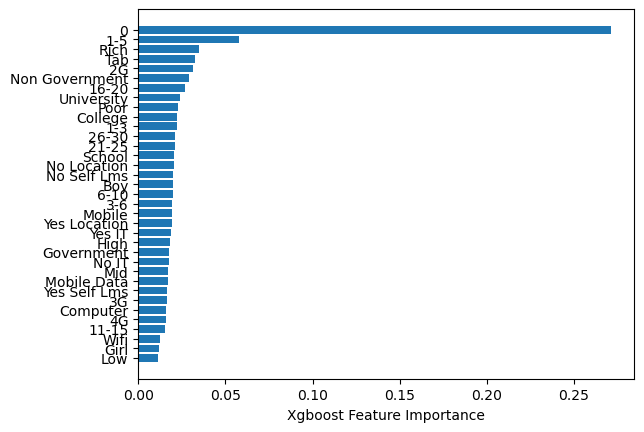

In [116]:
# plot feature importance
sorted_idx = final_model_df.feature_importances_.argsort()
plt.barh(aspectsdf.columns[sorted_idx], final_model_df.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

The XGBoost built in feature importance function has a default setting of using gain to determine the importance of each feature in the model. The gain type setting shows the average gain across all splits where feature was used. According to this, the features that were calculated to be the most important were students with zero hours of daily class instruction time, 1-5 hours of daily class instruction time, and having a financial condition of rich. This measurement of feature importance doesn't give as much information about how the features are important just that they are. This is interesting but not the ideal feature importance measurement for feature recommendations. 

## Permutation Based Feature Importance

In [117]:
perm_importance_df = permutation_importance(final_model_df, X_testdf, y_testdf)

Text(0.5, 0, 'Permutation Importance')

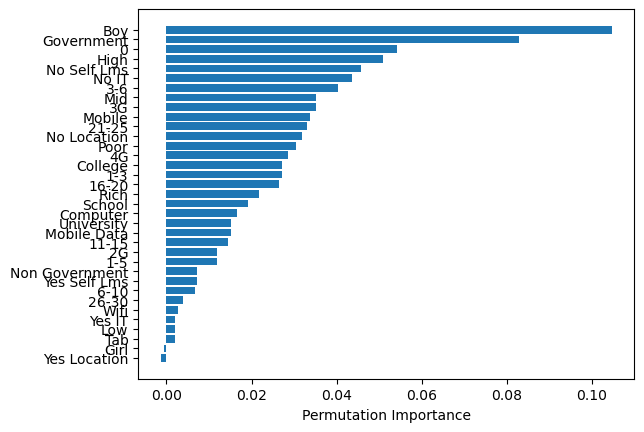

In [118]:
sorted_idx_df = perm_importance_df.importances_mean.argsort()
plt.barh(aspectsdf.columns[sorted_idx_df], perm_importance_df.importances_mean[sorted_idx_df])
plt.xlabel("Permutation Importance")

Permutation based feature importance uses the permutation method to calculate feature importance. The permutation method shuffles each feature and calculates the change in the models performance. According to importance determined using the permutation method, the most important features were the gender being male, the educational institution being government run, and zero hours of daily instruction time. Similar to the built in feature importance, the permutation method converys which features are important but not how they are important. 

## Feature Importance Computed with SHAP Values

In [119]:
explainer = shap.TreeExplainer(final_model_df)
shap_values = explainer.shap_values(X_testdf)

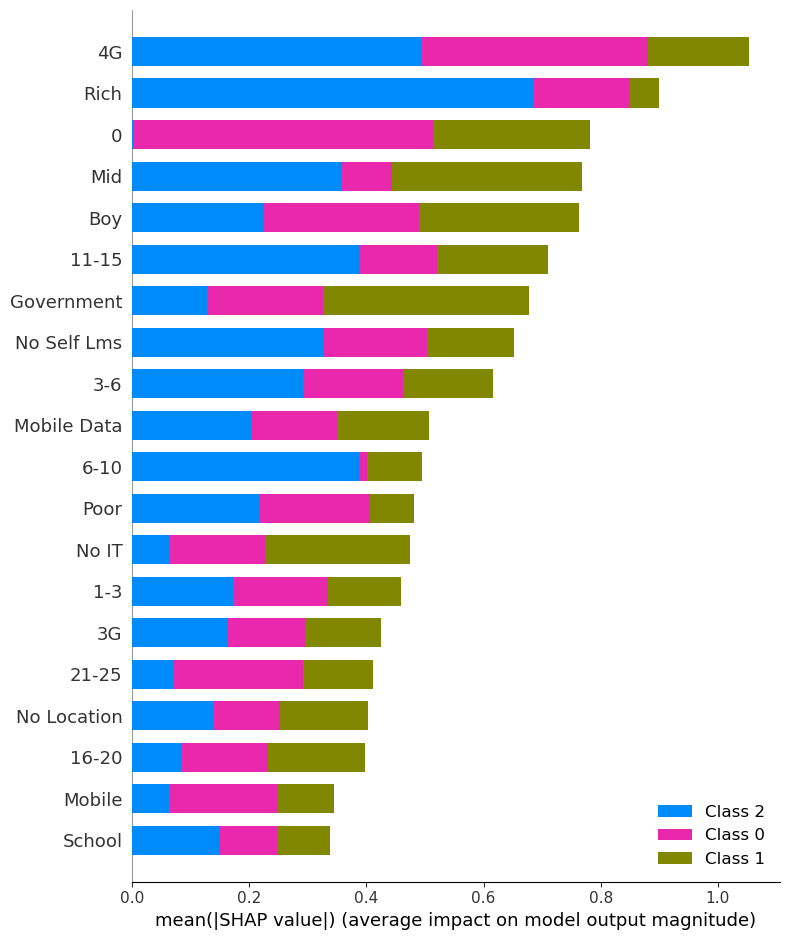

In [120]:
shap.summary_plot(shap_values, X_testdf, plot_type="bar")

The final feature importance was determined using SHAP values. It is model-agnostic and uses the Shapley values from game theory to estimate how each feature contributes to the prediction. According to the SHAP values the top three most important features were 4G network, being the financial condition of Rich, and zero hours of daily instruction time along with the online education. However, by using SHAP values more information is given about how these features are important. Unlike the previous two feature importance calculations, the SHAP values provide the average impact on each class level of the dependent variable, Adaptivity Level. This is much more useful for determining feature recommendations that can improve the chances a student will be high adaptivity level versus low or moderate. 

# Final Model Interpretation

The final model was developed using an optimized XGBoost Model, had a high **AUC value of .91** and an **average F1 Score of .91** for the test dataset. According to the Final Model, the following three features had the highest average impact on model output magnitude. 

 - **4G Network for Online Education**
 - **Financial Condition of Rich**
 - **Zero Hours of Daily Instruction**
 
 Of those three features that one that is the most potentially of interest in order to proactively prevent students from having low or moderate adaptivity levels is **Zero Hours of Daily Instruction**. According to the SHAP summary chart, this is the only feature that had only a positive impact on amounts of low and moderate adaptivity levels. Therefore, this may be a first area of exploration to potentially decrease the probability of a student having lower adaptivity levels. 

# Conclusion

The Federal Department of Education has a model that will have a **93% probability of accurately predicting a student with low adaptivity to online learning**, a **92% probability of accurately predicting a student with moderate adaptivity**, and a **79% probability of accurately predicting a student with high adaptivity**. The average **F1 score of the model for the test dataset was .91**. 

Using SHAP values from the final model, the following three features were determined to have the higest average impact on model output magnitude. 

 - **4G Network for Online Education**
 - **Rich Financial Condition**
 - **Zero Hours of Daily Instruction**
 
All three of these features are recommended to the Department of Education for additional research in order to determine proactive actions that can be taken to increase the probability that students will be at a high adaptivity level with their online education. Of these three features, **Zero Hours of Daily Instruction** is the only feature that has a high impact on low and moderate adaptivity levels and has no affect on high adaptivity levels. Therefore it maybe be the most efficent way to decrease the amount of low and moderate adaptivity students. 

# Next Steps

To continue working towards the goal of a highly predictive model and proactive recommendations based on feature findings, the Federal Department of Education could follow these additional suggestions:

 1. **Conduct additional surveys with students within the United States Educational System**
 2. **Conduct additional research into the impact of top features on low, moderate, and high adaptivity levels**
 3. **Additional exploration into optimized parameters for the XGBoost Model to increase AUC and F1 scores**